# <div style="text-align: center; font-family: Arial; font-size: 25px;color: #0047ab;"> <b>Analysis of Greater Boston Bluebike Usage for 2022-23</b>
</div>





<div style="text-align: center; font-family: Arial; font-size: 15px;color:#0047ab"> <b>Team A05: Aastha Surana, Adesina Adeniran, Nan Li, Pratik Mahajan, Shrinidhi Bhide, Soham Sarvade
    </div>


#**1. Business Problem Definition**

We plan to optimize Boston BlueBikes service for improved accessibility and efficiency. This will be done by identifying seasonal and geographic usage patterns of BlueBikes through historical data and conducting a demand analysis. Then we will check the docking stations to check how the supply fulfils the demand.


# <span style="font-family: Arial; font-size: 20px;color:#0047ab">**2. Executive Summary**

This report analyzes the Greater Boston BlueBikes system's usage patterns and infrastructure efficiency during 2022-2023. By examining ride demand, station distribution, and user behavior, it proposes actionable strategies to improve accessibility and operational performance.


**Objectives**

* Identify seasonal and geographic trends to optimize bike availability.
* Address station distribution gaps in high-demand areas.
* Differentiate member and casual rider behaviors for targeted improvements.
* Recommend system enhancements to support growth and reliability.

**Motivation**: As students commuting daily in Boston, we often struggle with BlueBikes—bikes are sometimes unavailable when needed, and docking stations are frequently full. Given Boston’s unreliable public transit, we want to analyze BlueBike usage patterns to identify inefficiencies and make biking a better commuting option for ourselves and other commuters.

**Methods**: We had two primary datasets: bluebike_trips and bluebike_stations. They contained information about trips and stations respectively. We uploaded these datasets to BigQuery, and used SQL to clean and merge them (on stationID) into one dataset which displayed the stations alongside the trip information. Then we queried the dataset to obtain insights which are given below.


**Key Findings**

1. **Seasonal Trends:** Member usage peaks in fall, casual usage in late summer, and weekday trips increased in 2023, with Thursday as the busiest day.
2. **Popular Routes:** MIT at Mass Ave / Amherst St leads as the busiest hub, with Cambridge-Boston and Brookline connections dominating.
3. **Infrastructure Gaps:** Brookline and Watertown lack sufficient stations despite high demand. Low-capacity stations support longer rides, while high-capacity stations enable frequent, shorter trips.
4. **Shifting Demand:** Central Square saw a steep decline in turnover, while Boylston St gained popularity, reflecting localized demand changes.

**Recommendations**
* **Strategic Expansion:** Add stations in high-demand but underserved areas like Brookline, Watertown, and Revere to meet growing needs.
* **Seasonal Operations:** Increase bike availability during winter and adjust station placements to support summer recreational routes.
* **Improve Weekday Services:** Prioritize reliability on key routes and busy days, such as Thursdays.
* **Enhance Casual Experience:** Promote campaigns for longer rides during off-peak seasons while maintaining member-centric incentives.


Here are the most insightful findings about BlueBikes usage patterns in the Greater Boston area:


 >**Key Hub Patterns**:
The MIT-Harvard corridor emerges as the system's backbone, with the MIT station at Mass Ave/Amherst St. consistently ranking as the most popular station throughout the year. This dominance is likely due to its strategic location at the Harvard Bridge connecting Cambridge and Boston.

> **Key User Type Patterns**:
membership subscribers count for 3/4 of the total customer base.

>**Outstanding Seasonal Trends**:
An outstanding pattern emerges in the seasonal usage with a peak in late summer and early fall, while monthly usage fluctuated more in 2022 than 2023. Winter months (January, February, December) showed growth in 2023 versus 2022.


>**Infrastructure-Usage Mismatch**:
An important infrastructure gap exists in certain municipalities:
While Boston (264 stations) and Cambridge (89 stations) have extensive coverage, some high-demand areas are underserved
Notably, Brookline and Watertown show high ridership despite having only 14 and 6 stations respectively, indicating potential need for expansion.


>**Inter-Municipal Connections**:
The system shows strong inter-municipal connectivity patterns, particularly between:
Cambridge-Boston
Somerville-Cambridge
Brookline-Boston
These connections highlight the bike-share system's role in facilitating cross-city commuting.


This analysis suggests that while BlueBikes effectively serves major academic and commercial hubs, there's room for strategic expansion in high-demand areas with currently limited infrastructure.


# <span style="font-family: Arial; font-size: 20px;color:#0047ab"> **Entity Relationship Diagram**

ERD
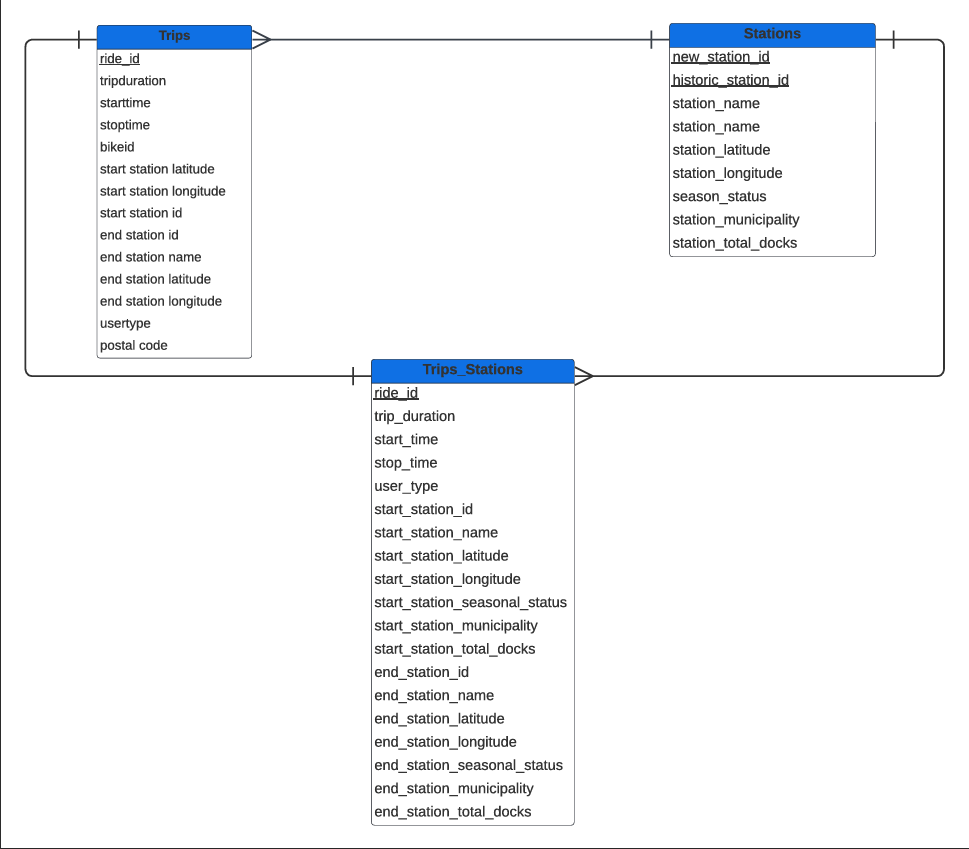

The Entity-Relationship Diagram (ERD) serves as a blueprint to illustrate how different datasets—Bluebike trips and stations—are connected to support our analysis. Here's a detailed breakdown of the ERD:

**Keys:**
* **Primary Key**
station_ID ensures unique identification of stations
trip_ID (if included) ensures unique identification of trips
* **Foreign Keys**
start_station_ID and end_station_ID in Bluebike_Trips serve as foreign keys referencing station_ID in Bluebike_Stations

**Relationships**
1.    **One-to-Many (1:N) Relationship:**
A station can serve as the starting point (start_station_ID) or ending point (end_station_ID) for multiple trips. For example: Station X might have hundreds of trips associated with it daily, highlighting its central role in the network
2.    **Mandatory vs. Optional:**
The relationships between Bluebike_Trips and Bluebike_Stations are mandatory, as every trip must have a start_station_ID and end_station_ID. During data cleaning, null station IDs were removed to maintain the integrity of these mandatory links
Attributes like seasonal_status are optional, as some stations do not have this information for year-round operations
3.    **Integration of Data:**
The datasets were merged by matching station_ID in Bluebike_Stations with start_station_ID and end_station_ID in Bluebike_Trips.

#<span style="font-family: Arial; font-size: 20px;color:#0047ab">**3. Data Sources and Data Dictionary**

Data Source:
    
• Bluebike trip datasets: [https://s3.amazonaws.com/hubway-data/index.html](https://s3.amazonaws.com/hubway-data/index.html)

• Bluebike station datasets: [https://bluebikes.com/system-data](https://bluebikes.com/system-data)


In the dataset, we have 24 monthly bluebike trip tables and one table containing detailed bluebike station information. In our analysis, we generate a stacked table with 24 month trip data.




| Field name                 | Type      |      Description             |
|:--------------------------:|:---------:|:---------------------------------------------------------------------------:|
| trip_duration              | INTEGER   |    <center>trip duration in seconds</center>         |
| start_time                 | TIMESTAMP |  start time of the bike trip, including year,month, date and datetime                                                |
| stop_time                  | TIMESTAMP |  end time of the bike trip,tart time of the bike trip, including year,month, date and datetime   
| user_type                  | STRING    |    members or casual customers  |
| start_station_ID           | STRING    |      -    |
| end_station_ID             | STRING    |      -     |
| start_station_name         | STRING    |       -   |
| start_station_lat          | FLOAT     |     the lattitude of the start station      |
| start_station_long         | FLOAT     |      the longitude of the start station      |
| start_seasonal_status      | STRING    |       year bound-stations available for the whole year; winter storage-stations not available from December to February   |
| start_station_municipality | STRING    |       -    |
| start_station_total_docks  | INTEGER   |        -  |
| end_station_name           | STRING    |        -  |
| end_station_lat            | FLOAT     |       the lattitude of the end station    |
| end_station_long           | FLOAT     |        the longitude of the end station     |
| end_seasonal_status        | STRING    |  year bound-stations available for the whole year; winter storage-stations not available from December to February        |
| end_station_municipality   | STRING    |         - |
| end_station_total_docks    | INTEGER   |         -  |


The table of station information contains following columns:

| Field name             | Type    | Description |
|:-----------------------:|:---------:|:-------------:|
| new_station_id         | STRING  | the new station ID after 2023, March          |
| station_name           | STRING  | -           |
| station_lat            | FLOAT   | -           |
| station_long           | FLOAT   | -           |
| seasonal_status        | STRING  |  year bound-stations available for the whole year; winter storage-stations not available from December to February         |
| station_municipality   | STRING  | the municipality where the station is located          |
| station_total_docks    | INTEGER |the total docks in the station         |
| historic_station_id    | STRING  | station ID before 2023, April          |



#<span style="font-family: Arial; font-size: 20px;color:#0047ab">**4.Data Cleaning & Table Merging**


<span style="font-family: Arial; font-size: 15px;">
First of all, we would like to make the columns of the 24 monthly trip tables into standard format before concatenating them into one table. As the monthly tables 2022_01 - 2023_03 have different schemas from the tables 2023_04 -2023_12, we need to standardize the schema across 24 tables.

For tables from 2023_04 to 2023_12:

In [2]:
%%bigquery

---- create a new table for 2023-04 to 2023-12 with relevant columns

CREATE TABLE ba775-project-a05.bluebike_trips.2023_04_to_12 AS
SELECT
  started_at AS start_time,
  ended_at AS stop_time,
  start_station_name,
  start_station_id,
  end_station_name,
  end_station_id,
  start_lat,
  start_lng AS start_long,
  end_lat,
  end_lng AS end_long,
  member_casual AS user_type
FROM
  `ba775-project-a05.bluebike_trips.2023_*`
WHERE
  _TABLE_SUFFIX BETWEEN '04' AND '12';


Executing query with job ID: 967ab494-16ec-4d69-b774-70a4896a1f17
Query executing: 0.43s


ERROR:
 400 Unrecognized name: started_at; Did you mean start_lat? at [5:3]; reason: invalidQuery, location: query, message: Unrecognized name: started_at; Did you mean start_lat? at [5:3]

Location: US
Job ID: 967ab494-16ec-4d69-b774-70a4896a1f17



In [3]:
%%bigquery
-- add new columns to the table 2023_04_to_12: trip_duration,buke_id, post_code

ALTER TABLE `ba775-project-a05.bluebike_trips.2023_04_to_12`
ADD COLUMN trip_duration INTEGER,
ADD COLUMN bike_id INTEGER,
ADD COLUMN post_code STRING;


Executing query with job ID: ac500ad9-0c75-4053-92c6-e6d796b40d2d
Query executing: 0.25s


ERROR:
 400 Column already exists: trip_duration at [4:12]; reason: invalidQuery, location: query, message: Column already exists: trip_duration at [4:12]

Location: US
Job ID: ac500ad9-0c75-4053-92c6-e6d796b40d2d



In [4]:
%%bigquery
-- calculate the trip_duration of table 2023_04_to_12

UPDATE `ba775-project-a05.bluebike_trips.2023_04_to_12`
SET trip_duration = TIMESTAMP_DIFF(stop_time, start_time, SECOND)
WHERE trip_duration IS NULL;

Query is running:   0%|          |

""


In [5]:
%%bigquery

--reset the order of columns in the table bluebike_trips.2023_04_12 and create a new table named bluebike_trips.new_202304_to_12

CREATE OR REPLACE TABLE ba775-project-a05.bluebike_trips.new_202304_to_12 AS
SELECT trip_duration,start_time,stop_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_long,end_lat,end_long,user_type,bike_id,post_code
FROM `ba775-project-a05.bluebike_trips.2023_04_to_12`

Query is running:   0%|          |

""


For tables 2022_01 to 2023_03:

In [6]:
%%bigquery

--concatenate the tables of 2022_01 to 2023_03, including the revelant columns and changing the column names

CREATE OR REPLACE TABLE ba775-project-a05.bluebike_trips.202201_to_202303 AS
SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_01`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_02`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_03`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_04`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_05`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_06`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_07`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_08`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_09`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_10`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_11`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2022_12`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2023_01`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2023_02`

UNION ALL

SELECT tripduration AS trip_duration,starttime AS start_time,stoptime AS stop_time,`start station name` AS start_station_name,`start station id` AS start_station_id,
`end station name` AS end_station_name, `end station id` AS end_station_id,`start station latitude` AS start_lat, `start station longitude` AS start_long,
`end station latitude` AS end_lat, `end station longitude` AS end_long, usertype AS user_type, bikeid AS bike_id,`postal code` AS post_code
FROM `ba775-project-a05.bluebike_trips.2023_03`


Query is running:   0%|          |

""


In [7]:
%%bigquery

-- Convert station id columns to string values and replace the table

CREATE OR REPLACE TABLE `ba775-project-a05.bluebike_trips.202201_to_202303` AS

SELECT
  trip_duration,
  start_time,
  stop_time,
  start_station_name,
  CAST(start_station_id AS STRING) AS start_station_id,
  end_station_name,
  CAST(end_station_id AS STRING) AS end_station_id,
  start_lat,
  start_long,
  end_lat,
  end_long,
  user_type,
  bike_id,
  post_code
FROM
  `ba775-project-a05.bluebike_trips.202201_to_202303`;


Query is running:   0%|          |

""


In [8]:
%%bigquery

UPDATE `ba775-project-a05.bluebike_trips.202201_to_202303`
SET user_type = CASE
WHEN user_type = 'Subscriber' THEN 'member'
WHEN user_type = 'Customer' THEN 'casual'
 END
WHERE user_type IN ('Customer','Subscriber');


Query is running:   0%|          |

""


Use UNION to concatenate the two tables to get all trip data in one table:

In [9]:
%%bigquery

-- concatenate the two tables: 202201_to_202303 and 2023_04_to_12 to

CREATE OR REPLACE TABLE ba775-project-a05.bluebike_trips.bluebike_trips_2022_2023 AS
SELECT *
FROM `ba775-project-a05.bluebike_trips.202201_to_202303`

UNION ALL

SELECT *
FROM `ba775-project-a05.bluebike_trips.new_202304_to_12`




Query is running:   0%|          |

""


<span style="font-family: Arial; font-size: 15px;">
We drop the null values from some columns mentioned above,drop bike_id and post_code columns, and make a new table.

In [10]:
%%bigquery
-- Replace the existing table with new data using the query
CREATE OR REPLACE TABLE `ba775-project-a05.bluebike_trips.bluebike_trips_2022_2023` AS

SELECT
  -- Select all columns except bike_id and post_code
 trip_duration,
 start_time,
 stop_time,
 start_station_name,
 start_station_id,
 end_station_name,
 end_station_id,
 start_lat,
 start_long,
 end_lat,
 end_long,
 user_type
FROM `ba775-project-a05.bluebike_trips.bluebike_trips_2022_2023`

WHERE
  start_station_name IS NOT NULL
  AND start_station_id IS NOT NULL
  AND end_station_name IS NOT NULL
  AND end_station_id IS NOT NULL
  AND end_lat IS NOT NULL
  AND end_long IS NOT NULL;


Query is running:   0%|          |

""


<span style="font-family: Arial; font-size: 15px;">Now, we go foward checking the station table

In [11]:
%%bigquery

-- rename the columns of station table

CREATE OR REPLACE TABLE `ba775-project-a05.bluebike_station_info.bluebike_station` AS
SELECT
    NULLIF(Number, 'TBD - upcoming install') AS new_station_id,
    NAME AS station_name,
    Lat AS station_lat,
    Long AS station_long,
    `Seasonal Status` AS seasonal_status,
    Municipality AS station_municipality,
    `Total Docks` AS station_total_docks,
    CAST(`Station ID _to match to historic system data_` AS STRING) AS historic_station_id
FROM
    `ba775-project-a05.bluebike_station_info.bluebike_station`;


Executing query with job ID: 51944eb1-8025-4286-8e44-5ac3c2dee5d4
Query executing: 0.34s


ERROR:
 400 GET https://bigquery.googleapis.com/bigquery/v2/projects/ba775-project-a05/queries/51944eb1-8025-4286-8e44-5ac3c2dee5d4?maxResults=0&location=US&prettyPrint=false: Unrecognized name: Number at [5:12]

Location: US
Job ID: 51944eb1-8025-4286-8e44-5ac3c2dee5d4



<span style="font-family: Arial; font-size: 15px;"> Then we check the null values in each column.

<span style="font-family: Arial; font-size: 15px;"> As we can see from the output above, only 6 stations have both missing new IDs.The missing historic IDs will not be a problem since the new IDs are recorded. We plan to drop these rows.

In [12]:
%%bigquery

-- Create or replace the table, filtering out rows where both new_station_id and historic_station_id are NULL
CREATE OR REPLACE TABLE `ba775-project-a05.bluebike_station_info.bluebike_station` AS

SELECT *
FROM `ba775-project-a05.bluebike_station_info.bluebike_station`
WHERE NOT (new_station_id IS NULL );



Query is running:   0%|          |

""


<span style="font-family: Arial; font-size: 15px;">Merging trip table and station table based on station IDs

In [13]:
%%bigquery

-- Due to the station ID system has been modified since April, 2023, a mapping table is created to map the historic and new id code system.
CREATE OR REPLACE TABLE `ba775-project-a05.bluebike_trips.final_bluebike_trips` AS

WITH station_mapping AS (
  SELECT
    COALESCE(CAST(new_station_id AS STRING), CAST(historic_station_id AS STRING)) AS unified_station_id,
    CAST(new_station_id AS STRING) AS new_station_id,
    CAST(historic_station_id AS STRING) AS historic_station_id
  FROM `ba775-project-a05.bluebike_station_info.bluebike_station`
),

-- Define a CTE to normalize the start and end station IDs
trips_normalized AS (
  SELECT
    t.*,
    -- Normalize the start station ID using station mapping
    COALESCE(sm.unified_station_id, CAST(t.start_station_id AS STRING)) AS normalized_start_station_id,
    -- Normalize the end station ID using station mapping
    COALESCE(em.unified_station_id, CAST(t.end_station_id AS STRING)) AS normalized_end_station_id
  FROM `ba775-project-a05.bluebike_trips.bluebike_trips_2022_2023` t



  -- Join with station_mapping to normalize start station
  LEFT JOIN station_mapping sm
    ON CAST(t.start_station_id AS STRING) = sm.new_station_id
    OR CAST(t.start_station_id AS STRING) = sm.historic_station_id

  -- Join with station_mapping to normalize end station
  LEFT JOIN station_mapping em
    ON CAST(t.end_station_id AS STRING) = em.new_station_id
    OR CAST(t.end_station_id AS STRING) = em.historic_station_id
)


-- Select from trips_normalized and enrich with station details
SELECT
  -- Explicitly select columns from trips_normalized to avoid duplicates
  tn.trip_duration,
  tn.start_time,
  tn.stop_time,
  tn.user_type,
  tn.normalized_start_station_id AS start_station_ID,
  tn.normalized_end_station_id AS end_station_ID,

  -- Enrich start station details
  bs_start.station_name AS start_station_name,
  bs_start.station_lat AS start_station_lat,
  bs_start.station_long AS start_station_long,
  bs_start.seasonal_status AS start_seasonal_status,
  bs_start.station_municipality AS start_station_municipality,
  bs_start.station_total_docks AS start_station_total_docks,

  -- Enrich end station details
  bs_end.station_name AS end_station_name,
  bs_end.station_lat AS end_station_lat,
  bs_end.station_long AS end_station_long,
  bs_end.seasonal_status AS end_seasonal_status,
  bs_end.station_municipality AS end_station_municipality,
  bs_end.station_total_docks AS end_station_total_docks

-- Select from trips_normalized
FROM trips_normalized tn

-- Join with station information to enrich start station details
LEFT JOIN `ba775-project-a05.bluebike_station_info.bluebike_station` bs_start
  ON tn.normalized_start_station_id = bs_start.new_station_id

-- Join with station information to enrich end station details
LEFT JOIN `ba775-project-a05.bluebike_station_info.bluebike_station` bs_end
  ON tn.normalized_end_station_id = bs_end.new_station_id;


Query is running:   0%|          |

""


In [14]:
%%bigquery

-- Create or replace the existing table by removing rows with NULL start_station_name or end_station_name

CREATE OR REPLACE TABLE `ba775-project-a05.bluebike_trips.final_bluebike_trips` AS

SELECT *
FROM `ba775-project-a05.bluebike_trips.final_bluebike_trips`
WHERE start_station_name IS NOT NULL
  AND end_station_name IS NOT NULL;


Query is running:   0%|          |

""


<span style="font-family: Arial; font-size: 15px;">  After merging trip dataset and station dataset, we drop duplicate rows.

In [15]:
%%bigquery

-- Create or replace the table by removing complete duplicates

CREATE OR REPLACE TABLE  `ba775-project-a05.bluebike_trips.final_version_bluebike_trips` AS
SELECT DISTINCT *
FROM `ba775-project-a05.bluebike_trips.final_bluebike_trips`;


Query is running:   0%|          |

""


In [16]:
%%bigquery

-- final check on null values of the final version bluebike table

SELECT COUNT(*) AS total_rows,
COUNTIF(trip_duration IS NULL),
COUNTIF(start_time IS NULL),
COUNTIF(stop_time IS NULL),
COUNTIF(user_type IS NULL),
COUNTIF(start_station_ID IS NULL),
COUNTIF(end_station_ID IS NULL ),
COUNTIF(start_station_name IS NULL),
COUNTIF(start_station_lat IS NULL),
COUNTIF(start_station_long IS NULL),
COUNTIF(start_seasonal_status IS NULL),
COUNTIF(start_station_municipality IS NULL),
COUNTIF(start_station_total_docks IS NULL),
COUNTIF(end_station_name IS NULL),
COUNTIF(end_station_lat IS NULL),
COUNTIF(end_station_long IS NULL),
COUNTIF(end_seasonal_status IS NULL),
COUNTIF(end_station_municipality IS NULL),
COUNTIF(end_station_total_docks IS NULL)
FROM  `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`

Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,f0_,f1_,f2_,f3_,f4_,f5_,f6_,f7_,f8_,f9_,f10_,f11_,f12_,f13_,f14_,f15_,f16_,f17_
0,7357568,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
%%bigquery

CREATE OR REPLACE TABLE `ba775-project-a05.bluebike_trips.final_version_bluebike_trips` AS
SELECT *
FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
WHERE trip_duration >= 0


Query is running:   0%|          |

""


#<span style="font-family: Arial; font-size: 20px;color:#0047ab">**5. Data Analysis**

##<span style="font-family: Arial; font-size: 15px;color:#0047ab">  5.1 Checking Service Areas

First, we would like to check some basic facts of the bluebike service areas and the station information. What are the service areas of bluebike in terms of municipalities；how many stations and docks are available in each municipality?

In [18]:
%%bigquery

-- identify all municipalities that the bluebike service covers

SELECT station_municipality
FROM `ba775-project-a05.bluebike_station_info.bluebike_station`
GROUP BY station_municipality

Query is running:   0%|          |

Downloading:   0%|          |

,station_municipality
0,Boston
1,Cambridge
2,Salem
3,Malden
4,Newton
5,Revere
6,Chelsea
7,Everett
8,Medford
9,Arlington


In [19]:
%%bigquery

SELECT station_municipality,COUNT(new_station_id) station_counts
FROM `ba775-project-a05.bluebike_station_info.bluebike_station`
GROUP BY station_municipality
ORDER BY station_counts DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,station_municipality,station_counts
0,Boston,264
1,Cambridge,89
2,Somerville,36
3,Salem,18
4,Newton,15
5,Brookline,14
6,Everett,13
7,Medford,11
8,Chelsea,6
9,Arlington,6


In [20]:
%%bigquery

SELECT station_municipality,SUM(station_total_docks) total_docks
FROM `ba775-project-a05.bluebike_station_info.bluebike_station`
GROUP BY station_municipality
ORDER BY total_docks DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,station_municipality,total_docks
0,Boston,4807
1,Cambridge,1782
2,Somerville,636
3,Brookline,218
4,Salem,204
5,Newton,194
6,Everett,182
7,Medford,137
8,Watertown,76
9,Chelsea,67


In [21]:
%%bigquery

-- check the average docks per station in each municipality

SELECT station_municipality AS municipality, COUNT(station_name) AS total_stations, ROUND(AVG(station_total_docks)) AS avg_docks_per_station
FROM `ba775-project-a05.bluebike_station_info.bluebike_station`
GROUP BY station_municipality
ORDER BY avg_docks_per_station DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,municipality,total_stations,avg_docks_per_station
0,Cambridge,89,20.0
1,Boston,264,18.0
2,Somerville,36,18.0
3,Brookline,14,16.0
4,Everett,13,14.0
5,Newton,15,13.0
6,Watertown,6,13.0
7,Medford,11,12.0
8,Salem,18,11.0
9,Malden,3,11.0


<span style="font-family: Arial; font-size: 15px;">Key findings:

There are 13 municipalities covered by the bluebike service so far. The city of Boston has the most stations and bike docks, while Watertown has the least. In terms of the average docks per station , Cambridge ranks the first out of the 13 service area.

##<span style="font-family: Arial; font-size: 15px;color:#0047ab"> 5.2 Checking trips 2022-2023
    
Now, we would like to move on checking some basic information of the data records in the bluebike trip 2022-2023 table with statistic summaries and visualizations, including trip durations, user types and popular routes among riders.
    

In [22]:
%%bigquery

SELECT
    COUNT(trip_duration) AS total_trip_count,
    ROUND(MIN(trip_duration)/60) AS min_duration_minutes,
    ROUND(MAX(trip_duration)/60) AS max_duration_minutes,
    --SUM(trip_duration) AS total_duration,
    AVG(trip_duration)/60 AS avg_duration_minutes
FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`;

Query is running:   0%|          |

Downloading:   0%|          |

,total_trip_count,min_duration_minutes,max_duration_minutes,avg_duration_minutes
0,7357478,0.0,98382.0,25.831985


In [23]:
%%bigquery
SELECT CONCAT(start_station_name, ' → ', end_station_name) AS route, COUNT(*) AS trip_count
FROM
    `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
GROUP BY route
ORDER BY trip_count DESC LIMIT 15;

Query is running:   0%|          |

Downloading:   0%|          |

,route,trip_count
0,MIT at Mass Ave / Amherst St → Beacon St at Ma...,9585
1,MIT at Mass Ave / Amherst St → Central Square ...,9118
2,Beacon St at Massachusetts Ave → MIT at Mass A...,9053
3,Harvard Square at Mass Ave/ Dunster → Harvard ...,8944
4,MIT at Mass Ave / Amherst St → MIT Vassar St,8066
5,Central Square at Mass Ave / Essex St → MIT Pa...,8001
6,MIT Vassar St → MIT Stata Center at Vassar St ...,7610
7,Central Square at Mass Ave / Essex St → MIT at...,7229
8,MIT Vassar St → MIT at Mass Ave / Amherst St,7177
9,Harvard University Radcliffe Quadrangle at She...,7161


In [24]:
%%bigquery
SELECT user_type,COUNT(*) AS count
FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
GROUP BY user_type
ORDER BY count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,user_type,count
0,member,5487578
1,casual,1869900


<span style="font-family: Arial; font-size: 15px;">Key findings:
    
1. For the bike routes between start stations and end stations, the most popular route is between MIT at Beacon St.at Mass Ave.Many routes involve MIT locations, suggesting it's a major hub for bluebikes. Harvard Square and Harvard University locations also feature prominently in several routes. The routes connect various academic institutions, squares, and streets in the area.

2. Based on the pie chart, memebrs make up the majority at 74.6% of users while casual users represent 25.4% of the total user base. This obervation suprises us as we expected more casual usage of blubikes in general.

3. the maximum trip duration is 98382 minutes, which is roughly equal to 2 months.The surprising finding indicates that some member users may keep the bike for an abnormaly long time. This may hinder the operation and management of the bluebike system.The minimum duration is 0, indicating that some users may rent the bike via the application accidentally and cancel it.
    
    

##<span style="font-family: Arial; font-size: 15px;color:#0047ab"> 5.3 Usage Analysis per Time Period

In the time period analysis, we firstly make a year-on-year comparison on the bike usage.

In [25]:
%%bigquery
SELECT
  EXTRACT(YEAR FROM start_time) AS year,
  COUNT(*) AS total_trips
FROM
  `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
WHERE
  EXTRACT(YEAR FROM start_time) IN (2022, 2023)
GROUP BY
  year
ORDER BY
  year;

Query is running:   0%|          |

Downloading:   0%|          |

,year,total_trips
0,2022,3715757
1,2023,3641721


Then we check the average trip durations per month for each year.The monthly average trip durations seem stable from 2022 to 2023.

In [26]:
%%bigquery

WITH data_2022 AS (
  SELECT
    EXTRACT(month FROM start_time) AS month,
    AVG(trip_duration) as avg_duration
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  WHERE EXTRACT(year FROM start_time) = 2022
  GROUP BY EXTRACT(month FROM start_time)
),
data_2023 AS (
  SELECT
    EXTRACT(month FROM start_time) AS month,
    AVG(trip_duration) as avg_duration
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  WHERE EXTRACT(year FROM start_time) = 2023
  GROUP BY EXTRACT(month FROM start_time)
)
SELECT
  d22.month AS month,
  ROUND(d22.avg_duration,1) AS avg_duration_2022,
  ROUND(d23.avg_duration,1) AS avg_duration_2023,
  ROUND((d23.avg_duration - d22.avg_duration)/60,1) AS difference_minutes
FROM data_2022 d22
LEFT JOIN data_2023 d23
  ON d22.month = d23.month
ORDER BY d22.month

Query is running:   0%|          |

Downloading:   0%|          |

,month,avg_duration_2022,avg_duration_2023,difference_minutes
0,1,1167.7,1195.7,0.5
1,2,1097.3,1217.6,2.0
2,3,1474.2,1303.2,-2.9
3,4,1437.9,1460.5,0.4
4,5,1642.2,1693.9,0.9
5,6,1800.2,1616.4,-3.1
6,7,1704.9,1698.1,-0.1
7,8,1646.6,2545.4,15.0
8,9,1427.5,1482.7,0.9
9,10,1362.6,1510.1,2.5


In [27]:
%%bigquery

SELECT
  EXTRACT(YEAR FROM start_time) AS year,
  EXTRACT(MONTH FROM start_time) AS month,
  COUNT(*) AS total_trips
FROM
  `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
GROUP BY
  year, month
ORDER BY
  year, month;

Query is running:   0%|          |

Downloading:   0%|          |

,year,month,total_trips
0,2022,1,79707
1,2022,2,107907
2,2022,3,179230
3,2022,4,271806
4,2022,5,347276
5,2022,6,384852
6,2022,7,426172
7,2022,8,483145
8,2022,9,595900
9,2022,10,413240


Next, we continue to check monthly rides by different types of users. We calculate casual and members for 2022, then for 2023, and then we join the two tables

In [28]:
%%bigquery

WITH data_2022 AS (
  SELECT
    EXTRACT(month FROM start_time) AS month,
    SUM(CASE WHEN user_type = 'casual' THEN 1 ELSE 0 END) AS casuals,
    SUM(CASE WHEN user_type = 'member' THEN 1 ELSE 0 END) AS members
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  WHERE EXTRACT(year FROM start_time) = 2022
  GROUP BY EXTRACT(month FROM start_time)
),
data_2023 AS (
  SELECT
    EXTRACT(month FROM start_time) AS month,
    SUM(CASE WHEN user_type = 'casual' THEN 1 ELSE 0 END) AS casuals,
    SUM(CASE WHEN user_type = 'member' THEN 1 ELSE 0 END) AS members
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  WHERE EXTRACT(year FROM start_time) = 2023
  GROUP BY EXTRACT(month FROM start_time)
)
SELECT
  d22.month,
  d22.casuals AS casuals_2022,
  d23.casuals AS casuals_2023,
  ROUND(((d23.casuals - d22.casuals)*100/d22.casuals),1) AS casual_diff_perc,
  d22.members AS members_2022,
  d23.members AS members_2023,
  ROUND(((d23.members - d22.members)*100/d22.members),1) AS members_diff_perc
FROM data_2022 d22
LEFT JOIN data_2023 d23
  ON d22.month = d23.month
ORDER BY d22.month

Query is running:   0%|          |

Downloading:   0%|          |

,month,casuals_2022,casuals_2023,casual_diff_perc,members_2022,members_2023,members_diff_perc
0,1,8706,21513,147.1,71001,116090,63.5
1,2,15188,23714,56.1,92719,126148,36.1
2,3,38946,36972,-5.1,140284,159465,13.7
3,4,73528,79400,8.0,198278,213653,7.8
4,5,114964,122663,6.7,232312,258940,11.5
5,6,121624,105063,-13.6,263228,257051,-2.3
6,7,138021,124450,-9.8,288151,279791,-2.9
7,8,113353,136545,20.5,369792,297896,-19.4
8,9,85529,112030,31.0,510371,303014,-40.6
9,10,110571,111937,1.2,302669,319789,5.7


Overall trip usage for casual users is peaking around the end of summertime and the beginning of the fall season. However, for the members, it peaks during the fall season, and not during the summers, which is surprising. A possible explanation is that the members go outside Boston for vacation.

By comparing the 2023 data with 2022 data, we find that both casual and member trips declined in 2023 for June and July. However, in 2023, winter months like January, February, and December saw a sharp increase in trips compared to the respective 2022 figures.

Finally, we narrow down to a daily period by checking the number of trips for each hour within a day and identifying the pattern.

In [29]:
%%bigquery

-- Checking the ride count distribution across hours of a day
SELECT
    EXTRACT(HOUR FROM start_time) AS hour_of_day,
    COUNT(*) AS ride_count
FROM
    `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
GROUP BY hour_of_day
ORDER BY hour_of_day;

Query is running:   0%|          |

Downloading:   0%|          |

,hour_of_day,ride_count
0,0,170935
1,1,125324
2,2,88868
3,3,56886
4,4,39699
5,5,54628
6,6,102671
7,7,215032
8,8,350878
9,9,269977


<span style="font-family: Arial; font-size: 15px;">Key Findings:
    
1. The total counts of trips are stable across 2022 and 2023.
    
2. Seasonal Peaks: BlueBike trips peak in summer, with August and September having the highest trip counts, indicating that blubike usage is largely impacted by seasons and potentially weather conditions. While the year-on-year monthly trip durations stay stable, by comparing the 2023 data with 2022 data, we find that both casual and member trips declined in 2023 for June and July. However, in 2023, winter months like January, February, and December saw a sharp increase in trip counts compared to the respective 2022 figures.

3. The bar chart reveals clear peak hours during the late afternoon and early evening, with the highest number of rides occurring around hour 5 PM at approximately 650,000 rides. There's a noticeable pattern where ridership is lowest in the early morning hours between 2-5 AM with fewer than 100,000 rides, and steadily increases throughout the day. This pattern may indicate that commuter may use bluebikes more during afternoon rush hour than that in the morning.   


##<span style="font-family: Arial; font-size: 15px;color:#0047ab"> 5.4 Usage Analysis per Municipality and Station

###5.4.1   Station frequency analysis:

What are the most frequently used start and end stations per month?

In [30]:
%%bigquery


---START Station---
WITH monthly_station_counts AS (
  SELECT
    start_station_name,
    EXTRACT(month FROM start_time) AS month,
    COUNT(start_station_name) AS count
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  GROUP BY month, start_station_name
),
max_counts AS (
  SELECT
    month,
    MAX(count) AS max_count
  FROM monthly_station_counts
  GROUP BY month
)
SELECT
  msc.month,
  msc.start_station_name,
  msc.count AS usage_count
FROM monthly_station_counts msc
JOIN max_counts mc
ON msc.month = mc.month AND msc.count = mc.max_count
ORDER BY msc.month;


Query is running:   0%|          |

Downloading:   0%|          |

,month,start_station_name,usage_count
0,1,MIT at Mass Ave / Amherst St,6126
1,2,MIT at Mass Ave / Amherst St,7970
2,3,MIT at Mass Ave / Amherst St,9887
3,4,MIT at Mass Ave / Amherst St,13914
4,5,MIT at Mass Ave / Amherst St,16086
5,6,MIT at Mass Ave / Amherst St,12090
6,7,MIT at Mass Ave / Amherst St,15212
7,8,MIT at Mass Ave / Amherst St,16608
8,9,MIT at Mass Ave / Amherst St,23763
9,10,MIT at Mass Ave / Amherst St,20518


In [31]:
%%bigquery

--END station---
WITH monthly_station_counts AS (
  SELECT
    end_station_name,
    EXTRACT(month FROM start_time) AS month,
    COUNT(end_station_name) AS count
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  GROUP BY month, end_station_name
),
max_counts AS (
  SELECT
    month,
    MAX(count) AS max_count
  FROM monthly_station_counts
  GROUP BY month
)
SELECT
  msc.month,
  msc.end_station_name,
  msc.count AS usage_count
FROM monthly_station_counts msc
JOIN max_counts mc
ON msc.month = mc.month AND msc.count = mc.max_count
ORDER BY msc.month;

Query is running:   0%|          |

Downloading:   0%|          |

,month,end_station_name,usage_count
0,1,MIT at Mass Ave / Amherst St,6000
1,2,MIT at Mass Ave / Amherst St,7944
2,3,MIT at Mass Ave / Amherst St,9812
3,4,MIT at Mass Ave / Amherst St,13863
4,5,MIT at Mass Ave / Amherst St,16150
5,6,MIT at Mass Ave / Amherst St,12002
6,7,MIT at Mass Ave / Amherst St,15128
7,8,MIT at Mass Ave / Amherst St,16587
8,9,MIT at Mass Ave / Amherst St,23949
9,10,MIT at Mass Ave / Amherst St,20676


Initially, we decided to query the table based on absolute counts to answer this question. When we did this, the query returned showed su that MIT at Mass Ave / Amherst St is the most popular station in Boston, as it was the top start and end station for every month. We realized that we needed to use percentage instead of absolute counts, and find a way to come up with a more meaningful answer to our question.


In [32]:
%%bigquery

--START STATION----
WITH monthly_station_counts AS (
  SELECT
    start_station_name,
    EXTRACT(month FROM start_time) AS month,
    COUNT(start_station_name) AS count
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  GROUP BY month, start_station_name
),
monthly_totals AS (
  SELECT
    month,
    SUM(count) AS total_trips
  FROM monthly_station_counts
  GROUP BY month
),
normalized_counts AS (
  SELECT
    msc.month,
    msc.start_station_name,
    msc.count AS usage_count,
    mt.total_trips,
    (msc.count / mt.total_trips) * 100 AS usage_percentage
  FROM monthly_station_counts msc
  JOIN monthly_totals mt
  ON msc.month = mt.month
),
ranked_counts AS (
  SELECT
    month,
    start_station_name,
    usage_count,
    usage_percentage,
    ROW_NUMBER() OVER (PARTITION BY month ORDER BY usage_percentage DESC) AS rank
  FROM normalized_counts
)
-- Select the top 3 stations for each month to check relative standings
SELECT
  month,
  start_station_name,
  usage_count,
  usage_percentage,
  rank
FROM ranked_counts
WHERE rank <= 3
ORDER BY month, rank;

Query is running:   0%|          |

Downloading:   0%|          |

,month,start_station_name,usage_count,usage_percentage,rank
0,1,MIT at Mass Ave / Amherst St,6126,2.819014,1
1,1,Central Square at Mass Ave / Essex St,5228,2.405780,2
2,1,MIT Pacific St at Purrington St,3661,1.684690,3
3,2,MIT at Mass Ave / Amherst St,7970,3.091916,1
4,2,Central Square at Mass Ave / Essex St,5505,2.135633,2
5,2,MIT Pacific St at Purrington St,4638,1.799285,3
6,3,MIT at Mass Ave / Amherst St,9887,2.631852,1
7,3,Central Square at Mass Ave / Essex St,7034,1.872403,2
8,3,Harvard Square at Mass Ave/ Dunster,5965,1.587842,3
9,4,MIT at Mass Ave / Amherst St,13914,2.463270,1


In [33]:
%%bigquery

---END STATION-----
WITH monthly_station_counts AS (
  SELECT
    end_station_name,
    EXTRACT(month FROM start_time) AS month,
    COUNT(end_station_name) AS count
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
  GROUP BY month, end_station_name
),
monthly_totals AS (
  SELECT
    month,
    SUM(count) AS total_trips
  FROM monthly_station_counts
  GROUP BY month
),
normalized_counts AS (
  SELECT
    msc.month,
    msc.end_station_name,
    msc.count AS usage_count,
    mt.total_trips,
    (msc.count / mt.total_trips) * 100 AS usage_percentage
  FROM monthly_station_counts msc
  JOIN monthly_totals mt
  ON msc.month = mt.month
),
ranked_counts AS (
  SELECT
    month,
    end_station_name,
    usage_count,
    usage_percentage,
    ROW_NUMBER() OVER (PARTITION BY month ORDER BY usage_percentage DESC) AS rank
  FROM normalized_counts
)
-- Select the top 3 stations for each month to check relative standings
SELECT
  month,
  end_station_name,
  usage_count,
  usage_percentage,
  rank
FROM ranked_counts
WHERE rank <= 3
ORDER BY month, rank;

Query is running:   0%|          |

Downloading:   0%|          |

,month,end_station_name,usage_count,usage_percentage,rank
0,1,MIT at Mass Ave / Amherst St,6000,2.761033,1
1,1,Central Square at Mass Ave / Essex St,5365,2.468823,2
2,1,MIT Pacific St at Purrington St,3392,1.560904,3
3,2,MIT at Mass Ave / Amherst St,7944,3.081829,1
4,2,Central Square at Mass Ave / Essex St,5516,2.139900,2
5,2,Harvard Square at Mass Ave/ Dunster,4663,1.808984,3
6,3,MIT at Mass Ave / Amherst St,9812,2.611888,1
7,3,Central Square at Mass Ave / Essex St,7105,1.891303,2
8,3,Harvard Square at Mass Ave/ Dunster,6148,1.636556,3
9,4,MIT at Mass Ave / Amherst St,13863,2.454241,1


Key findings:

This query provides a more meaningful answer to our question. It returns the top 3 start and end stations per month, displaying absolute usage counts and usage percentages, along with their rank. This is more meaningful because we can use our knowledge that MIT at Mass Ave being the most popular station is likely due to its convenient location. This station is located on the bridge that connects Cambridge and Boston through Mass Ave, which is the most convenient route to travel between the Boston side and Cambridge side. Knowing this, we can look at the start stations that rank 2 and 3, giving us a better idea of what other trips are especially common.

###5.4.2 Top 5 municipalities

What are the top 5 active municipalities as per start station of the trip?

In [34]:
%%bigquery

SELECT start_station_municipality, COUNT(*) AS ride_count
FROM `ba775-project-a05.bluebike_trips.final_bluebike_trips`
GROUP BY start_station_municipality
ORDER BY ride_count DESC
LIMIT 5;


Query is running:   0%|          |

Downloading:   0%|          |

,start_station_municipality,ride_count
0,Boston,3988954
1,Cambridge,2605437
2,Somerville,417824
3,Brookline,202127
4,Watertown,26688


Key findings:

Boston, Cambridge, Somerville, Brookline and Watertown are the most active municipalities according to the number of rides that originate from these stations. However according to our earlier queries we can observe that Brookline and Watertown have only 14 and 6 stations respectively. In order to meet the high demand of users in these two municipalities Bluebikes should increase the number of stations in these municipalities.

### 5.4.3 Top inter-municipality routes

What are the most popular inter-municipality routes?

In [35]:
%%bigquery

---Query for stations with most inter municipality trips
SELECT COUNT(*)AS num_inter_mncp_trips,start_station_municipality, end_station_municipality
FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
WHERE start_station_municipality<>end_station_municipality
GROUP BY start_station_municipality,end_station_municipality
ORDER BY num_inter_mncp_trips DESC
LIMIT 20;


Query is running:   0%|          |

Downloading:   0%|          |

,num_inter_mncp_trips,start_station_municipality,end_station_municipality
0,685507,Cambridge,Boston
1,652536,Boston,Cambridge
2,180997,Somerville,Cambridge
3,174911,Cambridge,Somerville
4,129860,Brookline,Boston
5,124889,Boston,Brookline
6,67291,Somerville,Boston
7,62393,Boston,Somerville
8,27722,Brookline,Cambridge
9,26412,Cambridge,Brookline


This query essentially finds out which are the most popular inter municipality routes. From the finding of this query we can observe that Cambridge-Boston , Somerville-Cambridge, Brookline-Boston, Somerville-Boston, Brookline- Cambridge are the most popular routes.

<span style="font-family: Arial; font-size: 15px;">Key Findings:
    

- MIT at Mass Ave / Amherst St. is the most popular start/end station throughout the year, likely due to its strategic location near the Harvard bridge, which is the most popular route between Cambridge and Boston across Charlse River.

- Most active municipalities by ride origin:Boston, Cambridge, Somerville, Brookline, and Watertown. Despite high demand, Brookline and Watertown have only 14 and 6 stations respectively, indicating a potential need for more stations in these areas.

- The top 3 most popular start/end stations are all located in Cambridge.


##5.5 Usage analysis per docking stations

In [36]:
%%bigquery
-- Turnover rate for each station by year
WITH station_turnover_by_year AS (
    SELECT
        t.start_station_id AS station_id,
        s.station_name AS station_name,
        s.station_municipality AS municipality,
        EXTRACT(YEAR FROM t.start_time) AS year, -- Extract the year from the trip's start time
        COUNT(*) AS trips_started,
        s.station_total_docks AS total_docks,
        ROUND(COUNT(*) / s.station_total_docks, 2) AS turnover_rate -- Turnover rate rounded to 2 decimals
    FROM
        `ba775-project-a05.bluebike_trips.bluebike_trips_2022_2023` t
    JOIN
        `ba775-project-a05.bluebike_station_info.bluebike_station` s
    ON
        t.start_station_id = s.historic_station_id -- Adjust this column name if needed
    GROUP BY
        t.start_station_id, s.station_name, s.station_municipality, s.station_total_docks, year
),
-- Pivot the data to compare 2022 and 2023 turnover rates
station_comparison AS (
    SELECT
        station_id,
        station_name,
        municipality,
        MAX(CASE WHEN year = 2022 THEN trips_started ELSE NULL END) AS trips_started_2022,
        MAX(CASE WHEN year = 2023 THEN trips_started ELSE NULL END) AS trips_started_2023,
        MAX(CASE WHEN year = 2022 THEN turnover_rate ELSE NULL END) AS turnover_rate_2022,
        MAX(CASE WHEN year = 2023 THEN turnover_rate ELSE NULL END) AS turnover_rate_2023
    FROM
        station_turnover_by_year
    GROUP BY
        station_id, station_name, municipality
),
-- Adding rankings for 2023 and 2022 turnover rates
station_with_ranks AS (
    SELECT
        *,
        RANK() OVER (ORDER BY turnover_rate_2023 DESC) AS rank_2023, -- Rank by 2023 turnover
        RANK() OVER (ORDER BY turnover_rate_2022 DESC) AS rank_2022  -- Rank by 2022 turnover
    FROM
        station_comparison
)
--Final query ordered by 2023 then 2022 turnover rates with a limit of top 15
SELECT
    station_id,
    station_name,
    municipality,
    trips_started_2022,
    trips_started_2023,
    turnover_rate_2022,
    turnover_rate_2023,
    rank_2023,
    rank_2022
FROM
    station_with_ranks
ORDER BY
    turnover_rate_2023 DESC, -- Primary order by 2023 turnover rate
    turnover_rate_2022 DESC -- Secondary order by 2022 turnover rate
LIMIT 15; -- Only include the top 15 stations

Query is running:   0%|          |

Downloading:   0%|          |

,station_id,station_name,municipality,trips_started_2022,trips_started_2023,turnover_rate_2022,turnover_rate_2023,rank_2023,rank_2022
0,68,Central Square at Mass Ave / Essex St,Cambridge,67534,9811,3554.42,516.37,1,1
1,67,MIT at Mass Ave / Amherst St,Cambridge,85638,12553,3171.78,464.93,2,3
2,74,Harvard Square at Mass Ave/ Dunster,Cambridge,60354,7967,3176.53,419.32,3,2
3,178,MIT Pacific St at Purrington St,Cambridge,44242,7295,2328.53,383.95,4,6
4,554,Forsyth St at Huntington Ave,Boston,35428,5705,2361.87,380.33,5,5
5,55,Boylston St at Massachusetts Ave,Boston,34319,5525,2287.93,368.33,6,7
6,75,Lafayette Square at Mass Ave / Main St / Colum...,Cambridge,31407,4382,2093.80,292.13,7,10
7,9,Commonwealth Ave at Agganis Way,Boston,35904,4201,2393.60,280.07,8,4
8,32,Landmark Center - Brookline Ave at Park Dr,Boston,31597,4110,2106.47,274.00,9,9
9,60,Charles Circle - Charles St at Cambridge St,Boston,41246,5109,2170.84,268.89,10,8


<ipython-input-56-fe134d35c51b>:71: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.read_gbq(query_results, project_id='ba775-project-a05')


<Axes: title={'center': 'Top 10 Stations Turnover Rate in 2023'}, xlabel='Station Name', ylabel='Turnover Rate'>

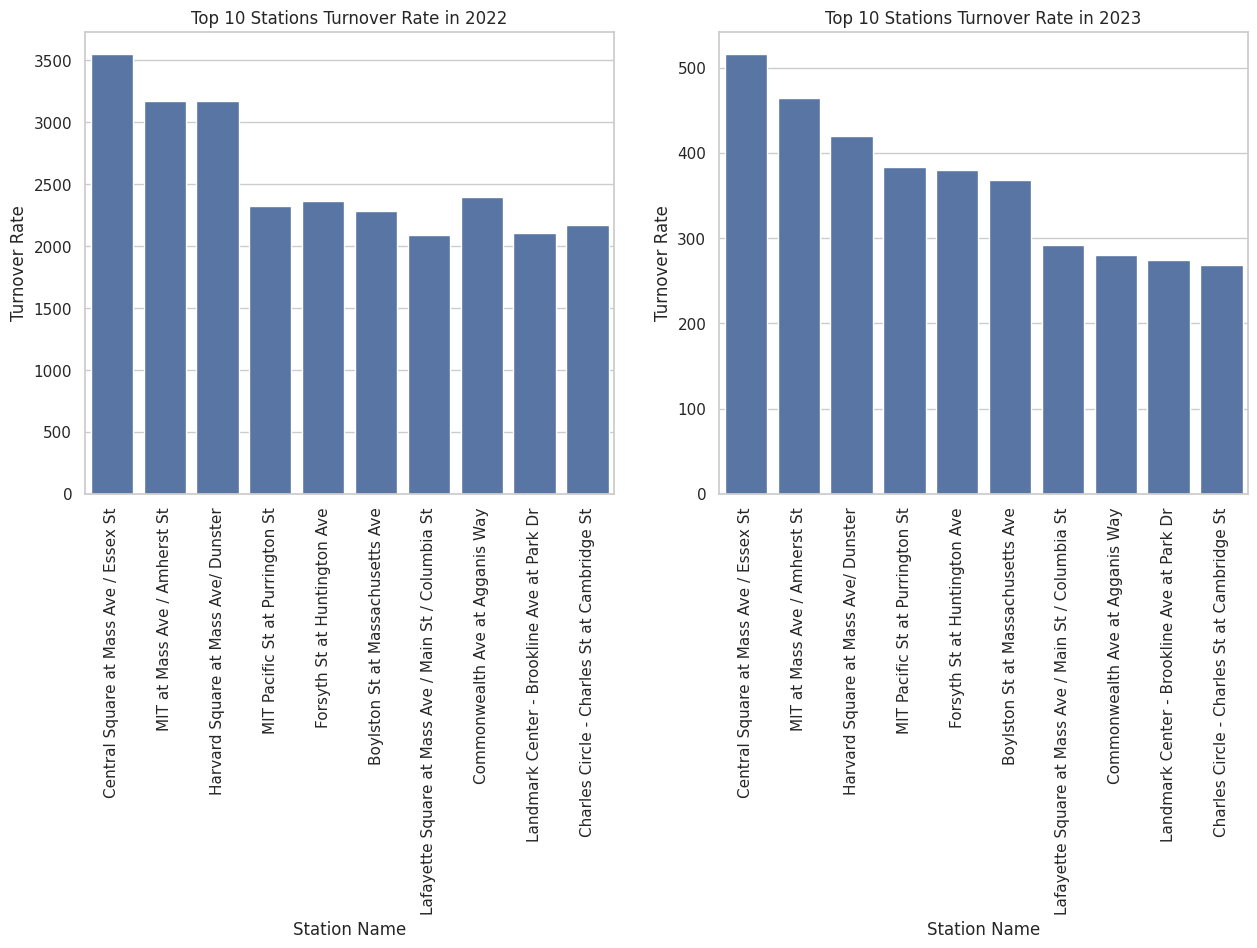

In [56]:
# prompt: Create a visualisation for above table. I want to see turnover for top 10 stations in the chart. compare for turnover_rate_2022 and turnover_rate_2023. use seaborn. use correct indexes from the data for the plot. do not plot rank. use bigquery results to populate df. use the query as above (write it again). Make 2 bar charts (one for 2022 and other for 2023) grouped and not stacked.


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your BigQuery results are stored in a variable called 'query_results'
query_results = """
-- Turnover rate for each station by year
WITH station_turnover_by_year AS (
    SELECT
        t.start_station_id AS station_id,
        s.station_name AS station_name,
        s.station_municipality AS municipality,
        EXTRACT(YEAR FROM t.start_time) AS year, -- Extract the year from the trip's start time
        COUNT(*) AS trips_started,
        s.station_total_docks AS total_docks,
        ROUND(COUNT(*) / s.station_total_docks, 2) AS turnover_rate -- Turnover rate rounded to 2 decimals
    FROM
        `ba775-project-a05.bluebike_trips.bluebike_trips_2022_2023` t
    JOIN
        `ba775-project-a05.bluebike_station_info.bluebike_station` s
    ON
        t.start_station_id = s.historic_station_id -- Adjust this column name if needed
    GROUP BY
        t.start_station_id, s.station_name, s.station_municipality, s.station_total_docks, year
),
-- Pivot the data to compare 2022 and 2023 turnover rates
station_comparison AS (
    SELECT
        station_id,
        station_name,
        municipality,
        MAX(CASE WHEN year = 2022 THEN trips_started ELSE NULL END) AS trips_started_2022,
        MAX(CASE WHEN year = 2023 THEN trips_started ELSE NULL END) AS trips_started_2023,
        MAX(CASE WHEN year = 2022 THEN turnover_rate ELSE NULL END) AS turnover_rate_2022,
        MAX(CASE WHEN year = 2023 THEN turnover_rate ELSE NULL END) AS turnover_rate_2023
    FROM
        station_turnover_by_year
    GROUP BY
        station_id, station_name, municipality
),
-- Adding rankings for 2023 and 2022 turnover rates
station_with_ranks AS (
    SELECT
        *,
        RANK() OVER (ORDER BY turnover_rate_2023 DESC) AS rank_2023, -- Rank by 2023 turnover
        RANK() OVER (ORDER BY turnover_rate_2022 DESC) AS rank_2022  -- Rank by 2022 turnover
    FROM
        station_comparison
)
--Final query ordered by 2023 then 2022 turnover rates with a limit of top 15
SELECT
    station_id,
    station_name,
    municipality,
    trips_started_2022,
    trips_started_2023,
    turnover_rate_2022,
    turnover_rate_2023,
    rank_2023,
    rank_2022
FROM
    station_with_ranks
ORDER BY
    turnover_rate_2023 DESC, -- Primary order by 2023 turnover rate
    turnover_rate_2022 DESC -- Secondary order by 2022 turnover rate
LIMIT 15; -- Only include the top 15 stations
"""
df = pd.read_gbq(query_results, project_id='ba775-project-a05')

df_top_10 = df.head(10)

# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# 2022 Turnover Bar Chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.barplot(x='station_name', y='turnover_rate_2022', data=df_top_10)
plt.xticks(rotation=90)
plt.title('Top 10 Stations Turnover Rate in 2022')
plt.xlabel('Station Name')
plt.ylabel('Turnover Rate')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 1st plot
sns.barplot(x='station_name', y='turnover_rate_2023', data=df_top_10)
plt.xticks(rotation=90)
plt.title('Top 10 Stations Turnover Rate in 2023')
plt.xlabel('Station Name')
plt.ylabel('Turnover Rate')

# 2023 Turnover Bar Chart
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd

<ipython-input-59-ab91633575b1>:71: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.read_gbq(query_results, project_id='ba775-project-a05')


Text(0.5, 1.0, 'Top 10 Stations Turnover Rate in 2022 vs 2023')

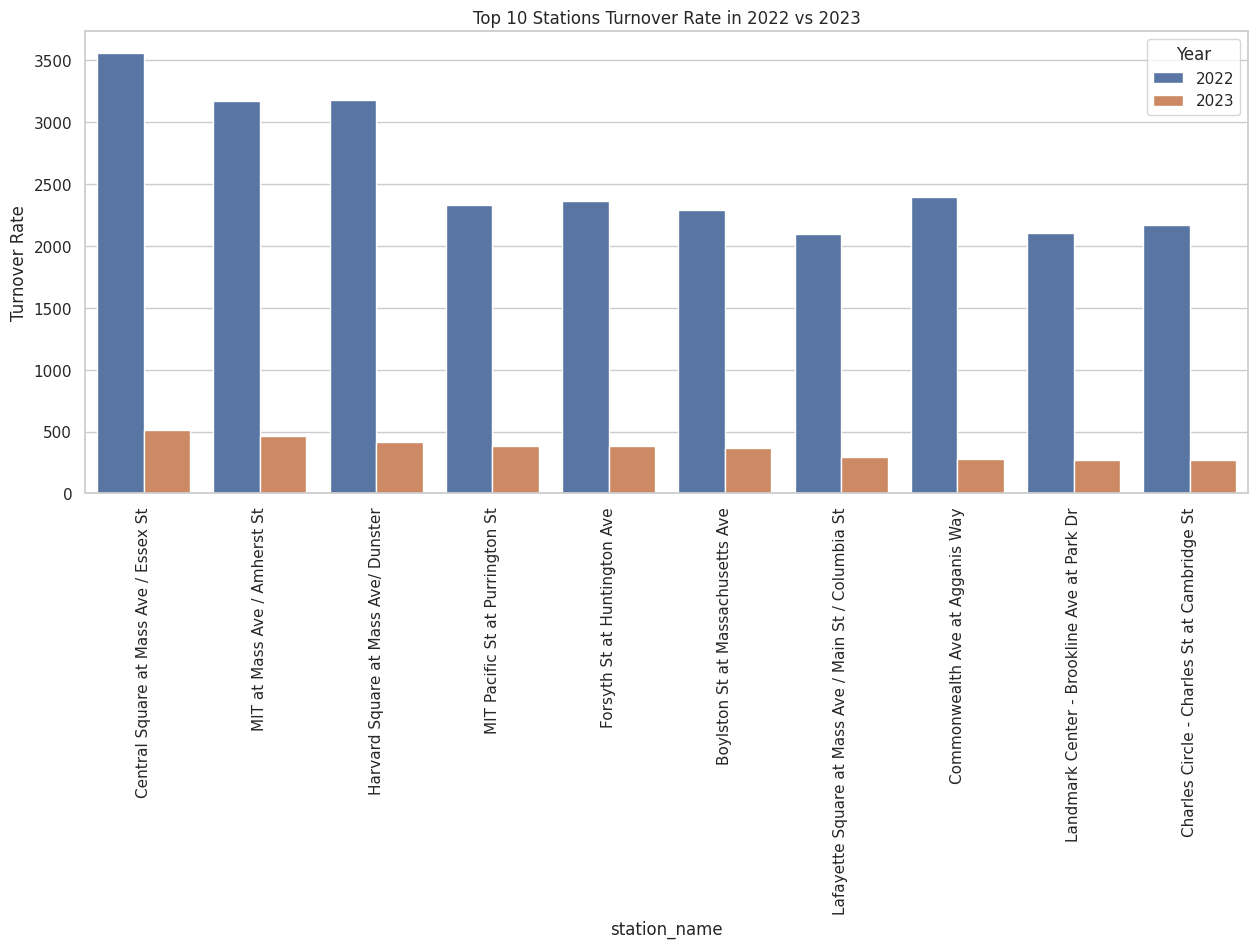

In [59]:
# prompt: regenerate the above charts but with no gridlines. Also, combine them both in one chart as a grouped bar chart with years in legend. Fix the error below


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your BigQuery results are stored in a variable called 'query_results'
query_results = """
-- Turnover rate for each station by year
WITH station_turnover_by_year AS (
    SELECT
        t.start_station_id AS station_id,
        s.station_name AS station_name,
        s.station_municipality AS municipality,
        EXTRACT(YEAR FROM t.start_time) AS year, -- Extract the year from the trip's start time
        COUNT(*) AS trips_started,
        s.station_total_docks AS total_docks,
        ROUND(COUNT(*) / s.station_total_docks, 2) AS turnover_rate -- Turnover rate rounded to 2 decimals
    FROM
        `ba775-project-a05.bluebike_trips.bluebike_trips_2022_2023` t
    JOIN
        `ba775-project-a05.bluebike_station_info.bluebike_station` s
    ON
        t.start_station_id = s.historic_station_id -- Adjust this column name if needed
    GROUP BY
        t.start_station_id, s.station_name, s.station_municipality, s.station_total_docks, year
),
-- Pivot the data to compare 2022 and 2023 turnover rates
station_comparison AS (
    SELECT
        station_id,
        station_name,
        municipality,
        MAX(CASE WHEN year = 2022 THEN trips_started ELSE NULL END) AS trips_started_2022,
        MAX(CASE WHEN year = 2023 THEN trips_started ELSE NULL END) AS trips_started_2023,
        MAX(CASE WHEN year = 2022 THEN turnover_rate ELSE NULL END) AS turnover_rate_2022,
        MAX(CASE WHEN year = 2023 THEN turnover_rate ELSE NULL END) AS turnover_rate_2023
    FROM
        station_turnover_by_year
    GROUP BY
        station_id, station_name, municipality
),
-- Adding rankings for 2023 and 2022 turnover rates
station_with_ranks AS (
    SELECT
        *,
        RANK() OVER (ORDER BY turnover_rate_2023 DESC) AS rank_2023, -- Rank by 2023 turnover
        RANK() OVER (ORDER BY turnover_rate_2022 DESC) AS rank_2022  -- Rank by 2022 turnover
    FROM
        station_comparison
)
--Final query ordered by 2023 then 2022 turnover rates with a limit of top 15
SELECT
    station_id,
    station_name,
    municipality,
    trips_started_2022,
    trips_started_2023,
    turnover_rate_2022,
    turnover_rate_2023,
    rank_2023,
    rank_2022
FROM
    station_with_ranks
ORDER BY
    turnover_rate_2023 DESC, -- Primary order by 2023 turnover rate
    turnover_rate_2022 DESC -- Secondary order by 2022 turnover rate
LIMIT 10; -- Only include the top 15 stations
"""
df = pd.read_gbq(query_results, project_id='ba775-project-a05')

df_top_10 = df.head(10)
df_melted = pd.melt(df_top_10, id_vars=['station_name'], value_vars=['turnover_rate_2022', 'turnover_rate_2023'], var_name='Year', value_name='Turnover Rate')
df_melted['Year'] = df_melted['Year'].str.replace('turnover_rate_', '')

plt.figure(figsize=(15, 6))
sns.barplot(x='station_name', y='Turnover Rate', hue='Year', data=df_melted)
plt.xticks(rotation=90)
plt.title('Top 10 Stations Turnover Rate in 2022 vs 2023')

Key Findings:

Utilisation rates dropped significantly across the top BlueBikes stations, with "Central Square" experiencing an 85% decline (3554.42 in 2022 to 516.37 in 2023). Similar reductions of 70–85% were observed across the top 15 stations, yet rankings remained largely consistent, indicating stable demand patterns.
Notable exceptions include stations like "Boylston St at Fairfield St," which jumped from 145th in 2022 to 14th in 2023, suggesting localized factors influencing demand. Stations in Cambridge and Boston continue to dominate the top rankings, reaffirming these municipalities as core hubs for BlueBikes usage.


##5.6 Usage analysis per day of the week

In [37]:
%%bigquery
-- Total trips for each year and day of the week
WITH trips_by_day AS (
    SELECT
        EXTRACT(YEAR FROM start_time) AS year, -- Extract year (2022 or 2023)
        EXTRACT(DAYOFWEEK FROM start_time) AS day_of_week, -- Extract day of the week (1=Sunday, 7=Saturday)
        CASE
            WHEN EXTRACT(DAYOFWEEK FROM start_time) = 1 THEN 'Sunday'
            WHEN EXTRACT(DAYOFWEEK FROM start_time) = 2 THEN 'Monday'
            WHEN EXTRACT(DAYOFWEEK FROM start_time) = 3 THEN 'Tuesday'
            WHEN EXTRACT(DAYOFWEEK FROM start_time) = 4 THEN 'Wednesday'
            WHEN EXTRACT(DAYOFWEEK FROM start_time) = 5 THEN 'Thursday'
            WHEN EXTRACT(DAYOFWEEK FROM start_time) = 6 THEN 'Friday'
            WHEN EXTRACT(DAYOFWEEK FROM start_time) = 7 THEN 'Saturday'
        END AS weekday_name, -- Convert numeric day to weekday name
        COUNT(*) AS total_trips -- Total trips per day of the week for each year
    FROM
        `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
    WHERE
        EXTRACT(YEAR FROM start_time) IN (2022, 2023) -- Filter for 2022 and 2023
    GROUP BY
        year, day_of_week, weekday_name
),
-- Calculating yearly totals for percentage computation
yearly_totals AS (
    SELECT
        year,
        SUM(total_trips) AS yearly_total_trips
    FROM
        trips_by_day
    GROUP BY
        year
)
-- Combining trip counts and percentages
SELECT
    d.weekday_name,
    MAX(CASE WHEN d.year = 2022 THEN d.total_trips ELSE NULL END) AS total_trips_2022,
    MAX(CASE WHEN d.year = 2023 THEN d.total_trips ELSE NULL END) AS total_trips_2023,
    MAX(CASE WHEN d.year = 2022 THEN ROUND(d.total_trips * 100.0 / y.yearly_total_trips, 2) ELSE NULL END) AS percentage_of_total_2022,
    MAX(CASE WHEN d.year = 2023 THEN ROUND(d.total_trips * 100.0 / y.yearly_total_trips, 2) ELSE NULL END) AS percentage_of_total_2023
FROM
    trips_by_day d
JOIN
    yearly_totals y
ON
    d.year = y.year
GROUP BY
    d.weekday_name
ORDER BY
    CASE
        WHEN d.weekday_name = 'Sunday' THEN 1
        WHEN d.weekday_name = 'Monday' THEN 2
        WHEN d.weekday_name = 'Tuesday' THEN 3
        WHEN d.weekday_name = 'Wednesday' THEN 4
        WHEN d.weekday_name = 'Thursday' THEN 5
        WHEN d.weekday_name = 'Friday' THEN 6
        WHEN d.weekday_name = 'Saturday' THEN 7
    END;

Query is running:   0%|          |

Downloading:   0%|          |

,weekday_name,total_trips_2022,total_trips_2023,percentage_of_total_2022,percentage_of_total_2023
0,Sunday,505096,449803,13.59,12.35
1,Monday,475109,482004,12.79,13.24
2,Tuesday,516034,547413,13.89,15.03
3,Wednesday,541423,570816,14.57,15.67
4,Thursday,551768,576714,14.85,15.84
5,Friday,556279,547156,14.97,15.02
6,Saturday,570048,467815,15.34,12.85


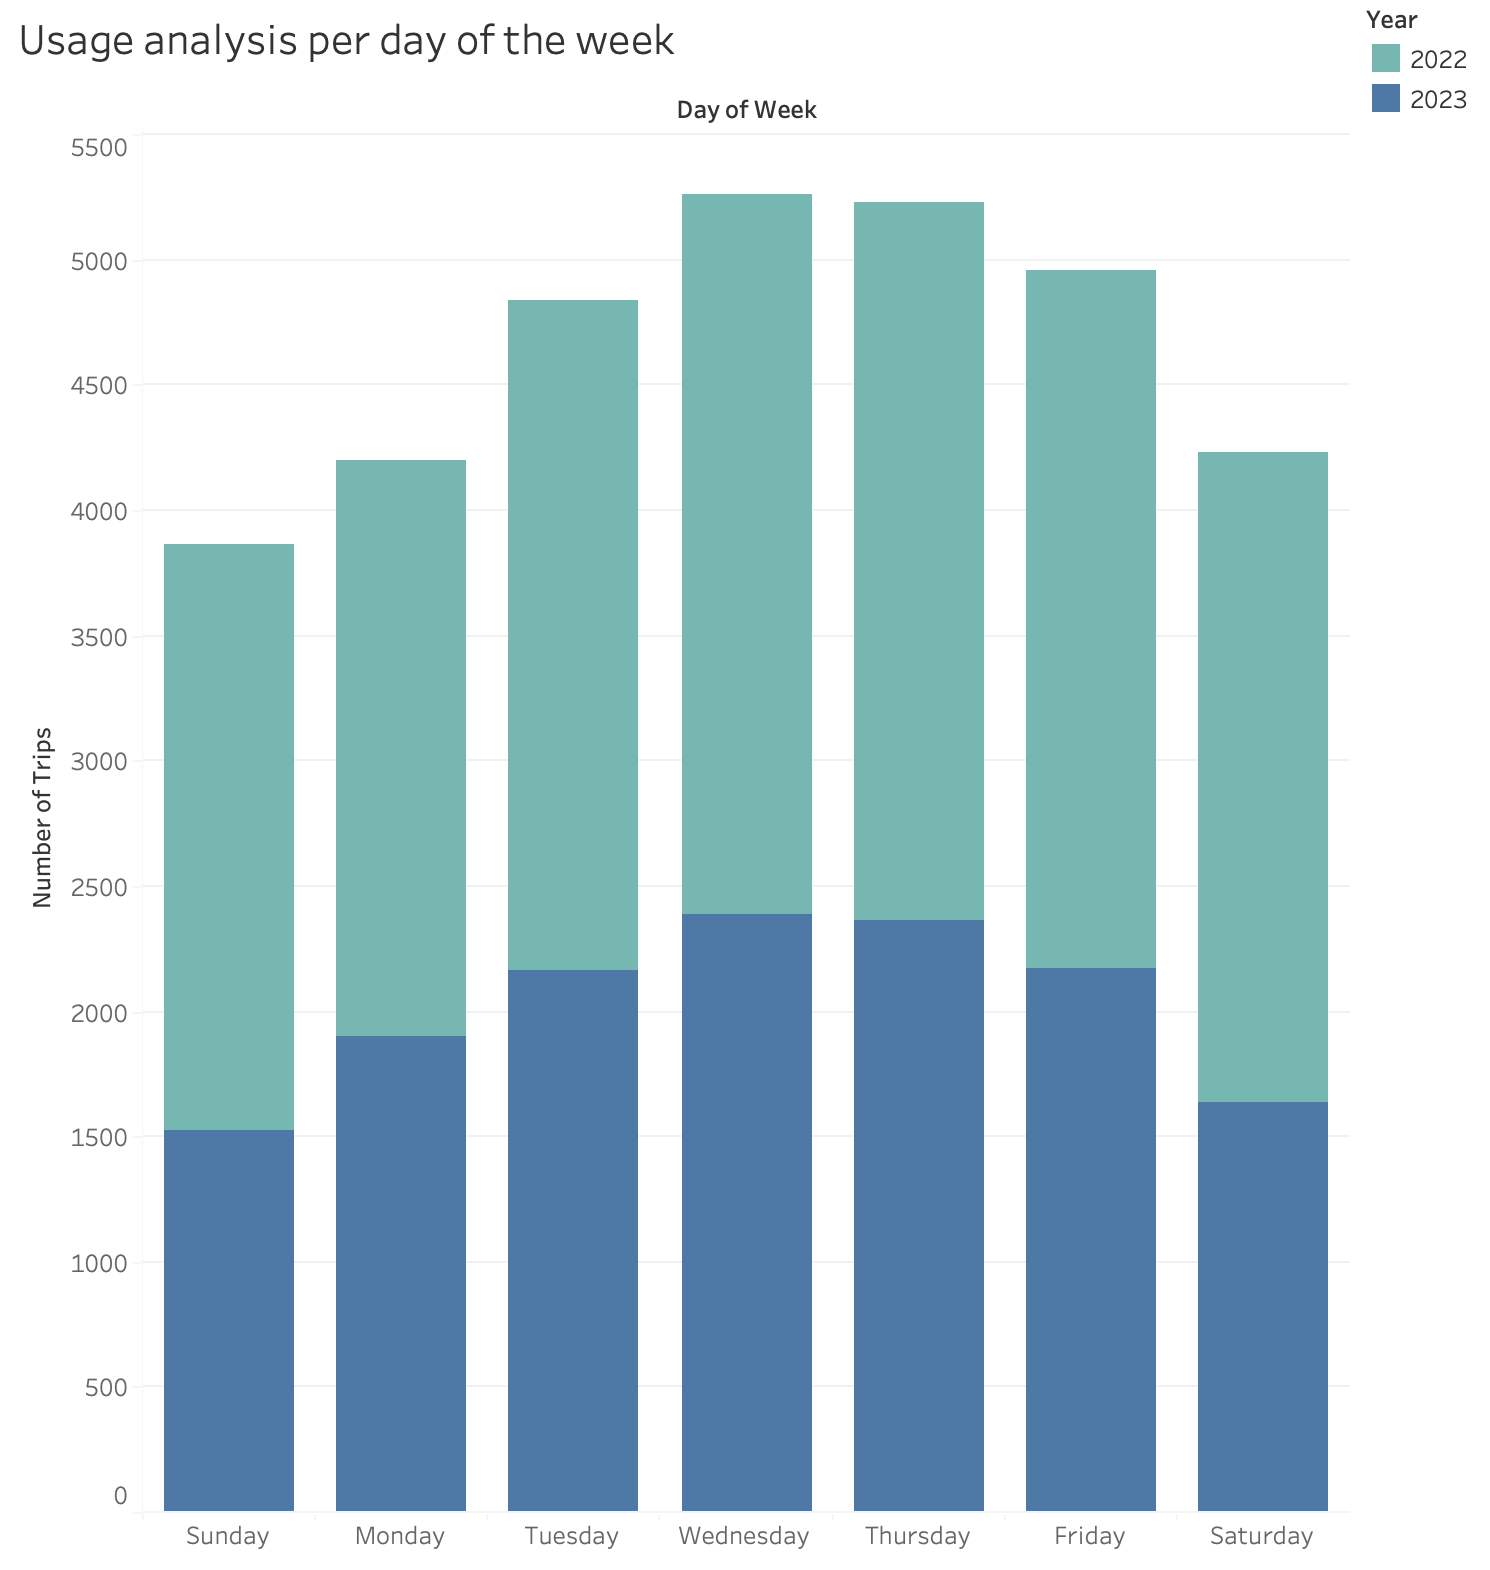

Key Findings:

Overall, weekend trips saw a decline in 2023, with Sunday trips dropping by 10.93% (510,086 to 454,340) and Saturday trips by 18.06% (576,519 to 472,418). In contrast, weekday trips gained a higher share, with notable increases on Tuesday (13.89% to 15.03%), Wednesday (14.58% to 15.67%), and Thursday (14.86% to 15.83%).
Saturday, previously the busiest day in 2022 (15.34% of trips), lost its dominance in 2023, with Thursday taking the lead at 15.83%. Meanwhile, the weekend's share of total trips decreased, with Saturday dropping to 12.85% and Sunday to 12.36%.

##5.7 Average Trip Duration by Dock Availability

In [38]:
%%bigquery
WITH DockTripStats AS (
    SELECT
        start_station_name AS station_name,
        start_station_total_docks AS total_docks,
        AVG(trip_duration) AS avg_trip_duration,
        COUNT(*) AS total_trips
    FROM
        `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
    GROUP BY
        start_station_name, start_station_total_docks
)

SELECT
    CASE
        WHEN total_docks < 15 THEN 'Low Capacity (<10)'
        WHEN total_docks BETWEEN 15 AND 25 THEN 'Medium Capacity (15-255)'
        ELSE 'High Capacity (>25)'
    END AS dock_category,
    COUNT(DISTINCT total_docks) AS number_of_docks_per_category,
    AVG(avg_trip_duration) AS avg_duration_per_category,
    SUM(total_trips) AS total_trips_per_category
FROM
    DockTripStats
GROUP BY
    dock_category
ORDER BY
    dock_category;

Query is running:   0%|          |

Downloading:   0%|          |

,dock_category,number_of_docks_per_category,avg_duration_per_category,total_trips_per_category
0,High Capacity (>25),9,1709.392908,923633
1,Low Capacity (<10),6,4704.807504,207300
2,Medium Capacity (15-255),9,3071.559406,6226545


Key Findings:

Stations with high capacity (>25 docks) accounted for the highest total trips (923,633) but had the shortest average trip duration (1,709.39 seconds). Medium-capacity stations (15–25 docks) contributed significantly to overall trips (622,645) and had a moderate average trip duration (3,071.56 seconds).
Low-capacity stations (<10 docks), while hosting the fewest trips (207,300), recorded the longest average trip duration (4,704.81 seconds). This pattern suggests that stations with fewer docks may cater to different trip needs, such as longer-distance rides, compared to high-capacity stations that may serve shorter, frequent trips.

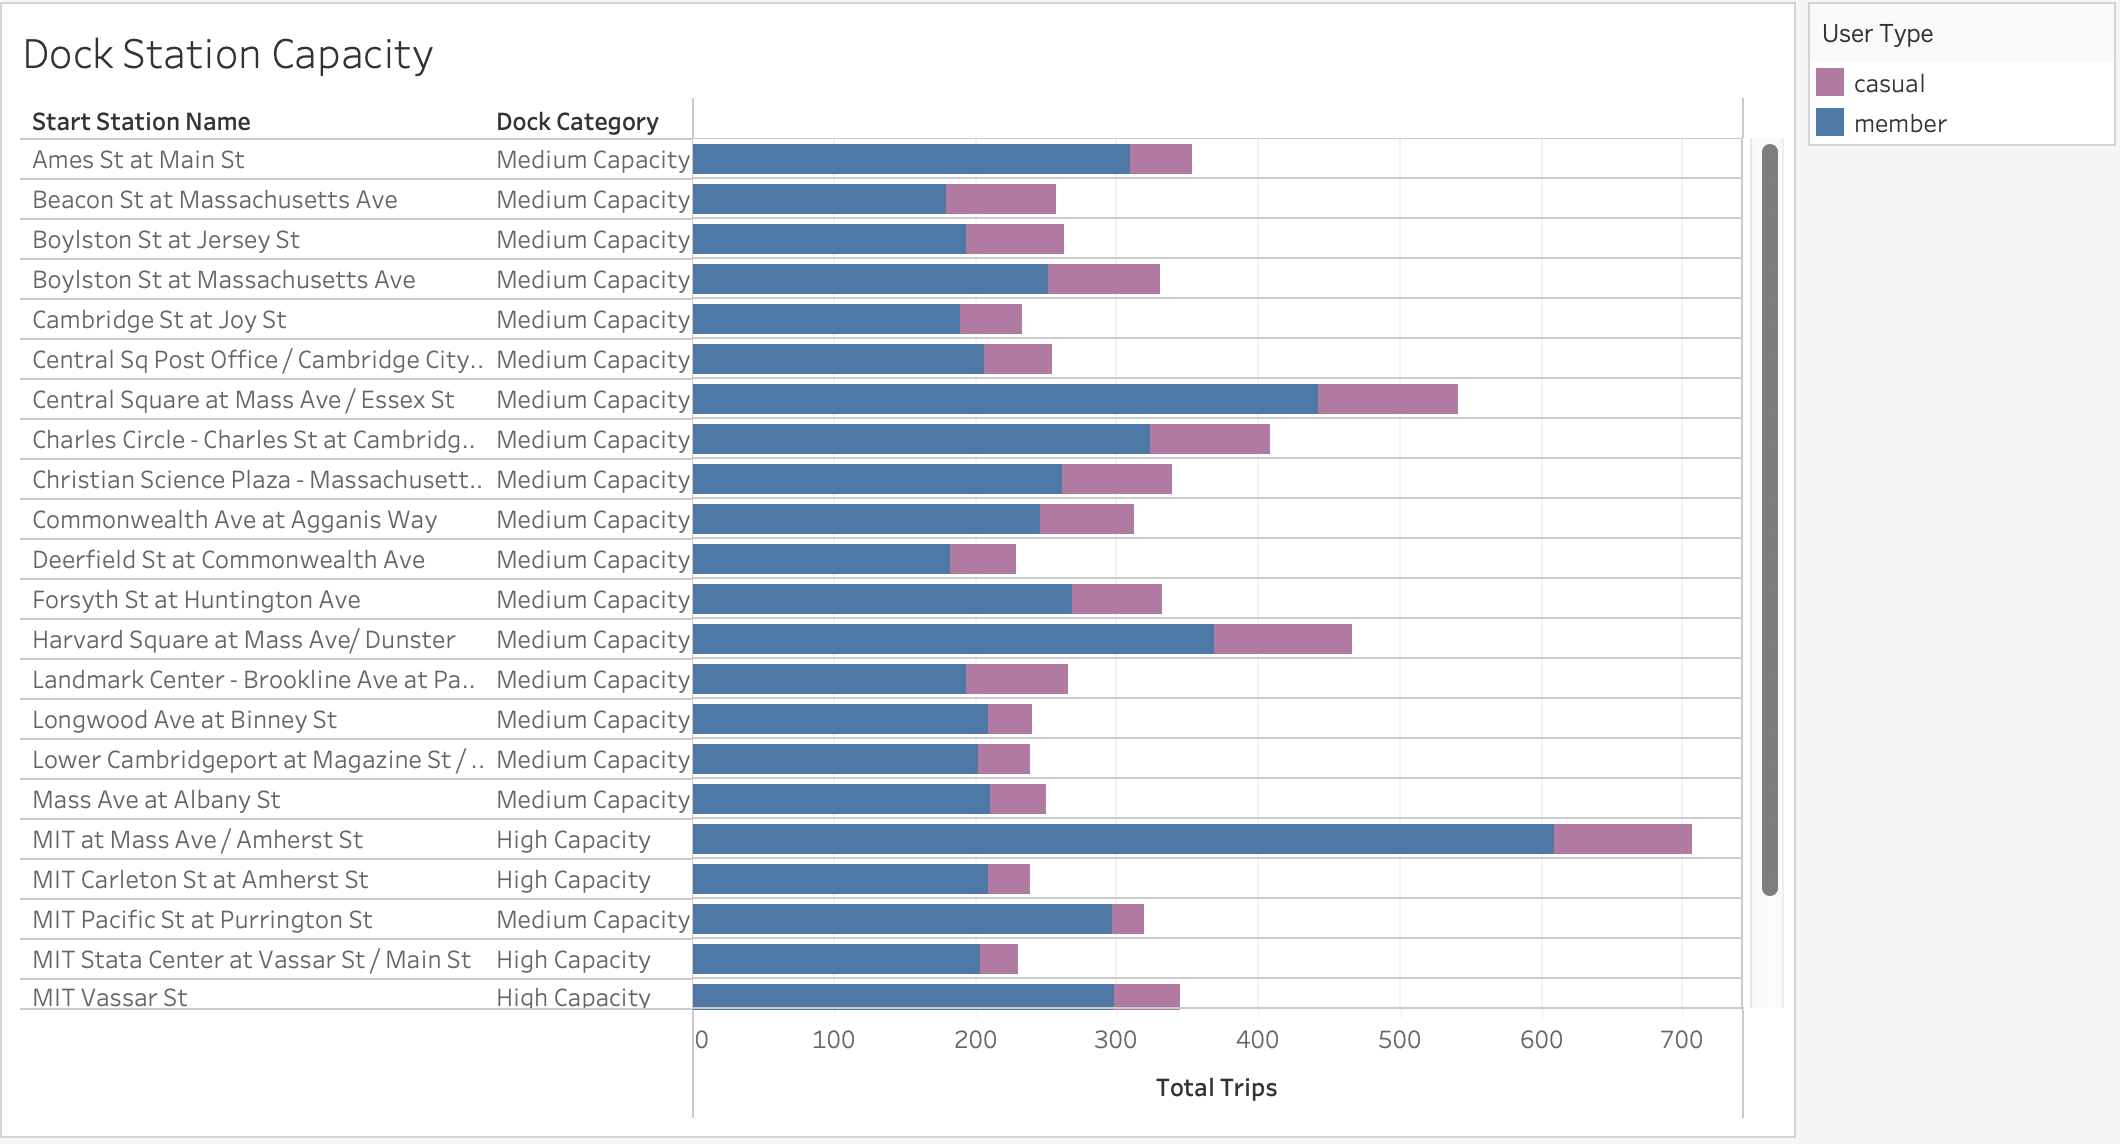

##5.8 Weekday vs Weekend analysis

What is the average Trip Duration per route for weekday and weekend?

In [39]:
%%bigquery
WITH station_pairs AS (
    SELECT
        start_station_name,
        end_station_name,
        AVG(CASE
            WHEN EXTRACT(DAYOFWEEK FROM start_time) IN (1, 7) THEN trip_duration
        END)/60 as weekend_avg_duration,
        AVG(CASE
            WHEN EXTRACT(DAYOFWEEK FROM start_time) IN (2,3,4,5,6) THEN trip_duration
        END)/60 as weekday_avg_duration,
        COUNT(*) as total_trips
    FROM ba775-project-a05.bluebike_trips.final_version_bluebike_trips
    GROUP BY
        start_station_name,
        end_station_name
    HAVING total_trips >= 1
),
abc AS (
SELECT
    PERCENTILE_CONT(trip_duration/60, 0.5) OVER() as median_duration
FROM ba775-project-a05.bluebike_trips.final_version_bluebike_trips LIMIT 1)
SELECT
    start_station_name,
    end_station_name,
    ROUND(weekend_avg_duration, 1) as weekend_avg_duration_mins,
    ROUND(weekday_avg_duration, 1) as weekday_avg_duration_mins,
    ABS(ROUND((ROUND(weekend_avg_duration, 1) - ROUND(weekday_avg_duration, 1)),1)) AS difference,
    (SELECT median_duration FROM abc) AS median_duration,
    total_trips
FROM station_pairs
WHERE weekend_avg_duration IS NOT NULL
    AND weekday_avg_duration IS NOT NULL
ORDER BY total_trips DESC, difference DESC

Query is running:   0%|          |

Downloading:   0%|          |

,start_station_name,end_station_name,weekend_avg_duration_mins,weekday_avg_duration_mins,difference,median_duration,total_trips
0,MIT at Mass Ave / Amherst St,Beacon St at Massachusetts Ave,6.3,5.5,0.8,12.05,9585
1,MIT at Mass Ave / Amherst St,Central Square at Mass Ave / Essex St,8.8,7.8,1.0,12.05,9118
2,Beacon St at Massachusetts Ave,MIT at Mass Ave / Amherst St,6.6,6.2,0.4,12.05,9053
3,Harvard Square at Mass Ave/ Dunster,Harvard University Radcliffe Quadrangle at She...,8.4,7.3,1.1,12.05,8944
4,MIT at Mass Ave / Amherst St,MIT Vassar St,8.4,7.0,1.4,12.05,8066
...,...,...,...,...,...,...,...
79257,State Street at Channel Center,MIT Carleton St at Amherst St,19.4,19.4,0.0,12.05,2
79258,55 Wheeler Street,Union Square - Brighton Ave at Cambridge St,37.7,37.7,0.0,12.05,2
79259,Washington St at Peters Park,699 Mt Auburn St,36.8,36.8,0.0,12.05,2
79260,Broadway at Beacham St,MIT Carleton St at Amherst St,27.8,27.8,0.0,12.05,2


Key findings:

For the busiest routes, weekday trip duration averages are typically lower than weekend durations by around 1 minute. This suggests that people are probably in a hurry during the weekdays and so tend to go faster, while they are more relaxed during weekends so they tend to go slower. It is a bit surprising because one may expect the popular routes to have more traffic and so go slower on weekdays, but the data doesn't support this hypothesis.

We don't see this trend for the less popular or longer routes. Perhaps the people who use these routes are in professions which are indifferent to weekend holidays, or maybe the dataset is not big enough in this domain for it to capture greater insights. It is also possible that the distance is so large that minor differences in trip durations don't have any impact.

##5.9 Seasonal and Temporal patterns of bike users

In [40]:
%%bigquery

WITH temporal_metrics AS (
  SELECT
    user_type,
    EXTRACT(HOUR FROM start_time) as hour_of_day,
    EXTRACT(DAYOFWEEK FROM start_time) as day_of_week,
    CASE
      WHEN EXTRACT(HOUR FROM start_time) BETWEEN 7 AND 9 THEN 'Morning Rush'
      WHEN EXTRACT(HOUR FROM start_time) BETWEEN 16 AND 18 THEN 'Evening Rush'
      ELSE 'Off Peak'
    END as peak_category,
    trip_duration/60 as duration_minutes,
    CASE
      WHEN EXTRACT(MONTH FROM start_time) IN (6,7,8) THEN 'Summer'
      WHEN EXTRACT(MONTH FROM start_time) IN (12,1,2) THEN 'Winter'
      ELSE 'Fall'
    END as season
  FROM ba775-project-a05.bluebike_trips.final_version_bluebike_trips
),
commute_patterns AS (
  SELECT
    user_type,
    peak_category,
    season,
    COUNT(*) as ride_count,
    ROUND(AVG(duration_minutes), 2) as avg_duration,
    COUNT(DISTINCT day_of_week) as active_days
  FROM temporal_metrics
  GROUP BY 1,2,3
)
SELECT
  user_type,
  peak_category,
  season,
  ride_count,
  avg_duration,
  ROUND(ride_count * 100.0 / SUM(ride_count) OVER (PARTITION BY user_type), 2) as percentage_of_user_rides,
  ROUND(ride_count * 100.0 / SUM(ride_count) OVER (PARTITION BY peak_category), 2) as percentage_of_timeperiod
FROM commute_patterns
WHERE ride_count > 50
ORDER BY user_type, ride_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,user_type,peak_category,season,ride_count,avg_duration,percentage_of_user_rides,percentage_of_timeperiod
0,casual,Off Peak,Fall,673798,52.02,36.03,14.17
1,casual,Off Peak,Summer,530491,65.25,28.37,11.16
2,casual,Evening Rush,Fall,255668,50.12,13.67,14.46
3,casual,Evening Rush,Summer,172239,62.67,9.21,9.74
4,casual,Off Peak,Winter,85686,52.12,4.58,1.80
5,casual,Morning Rush,Fall,76359,34.55,4.08,9.14
6,casual,Morning Rush,Summer,36326,44.30,1.94,4.35
7,casual,Evening Rush,Winter,28137,49.05,1.50,1.59
8,casual,Morning Rush,Winter,11196,36.38,0.60,1.34
9,member,Off Peak,Fall,1851409,15.55,33.74,38.95


Key Findings:

Casual riders showed peak usage during off-peak hours in fall (673,798 rides) and summer (530,491 rides), with longer average durations of 52.02 and 65.25 minutes, respectively. Evening rush hours saw fewer rides, with counts ranging from 255,668 (fall) to 172,239 (summer) and durations of 50.12–62.67 minutes. Winter had lower off-peak rides (85,686) but comparable durations of 52.12 minutes.
Members dominated off-peak fall rides (1,851,409) with much shorter average durations of 15.55 minutes. Casual users favored summer off-peak times, while members consistently preferred shorter, frequent rides during off-peak hours throughout the year.

#**6. Tableau Dashboard**

[Tableau Public dashboard](https://public.tableau.com/app/profile/adesina.adeniran/viz/ba775projectfinalcopy/BlueBikes?publish=yes)

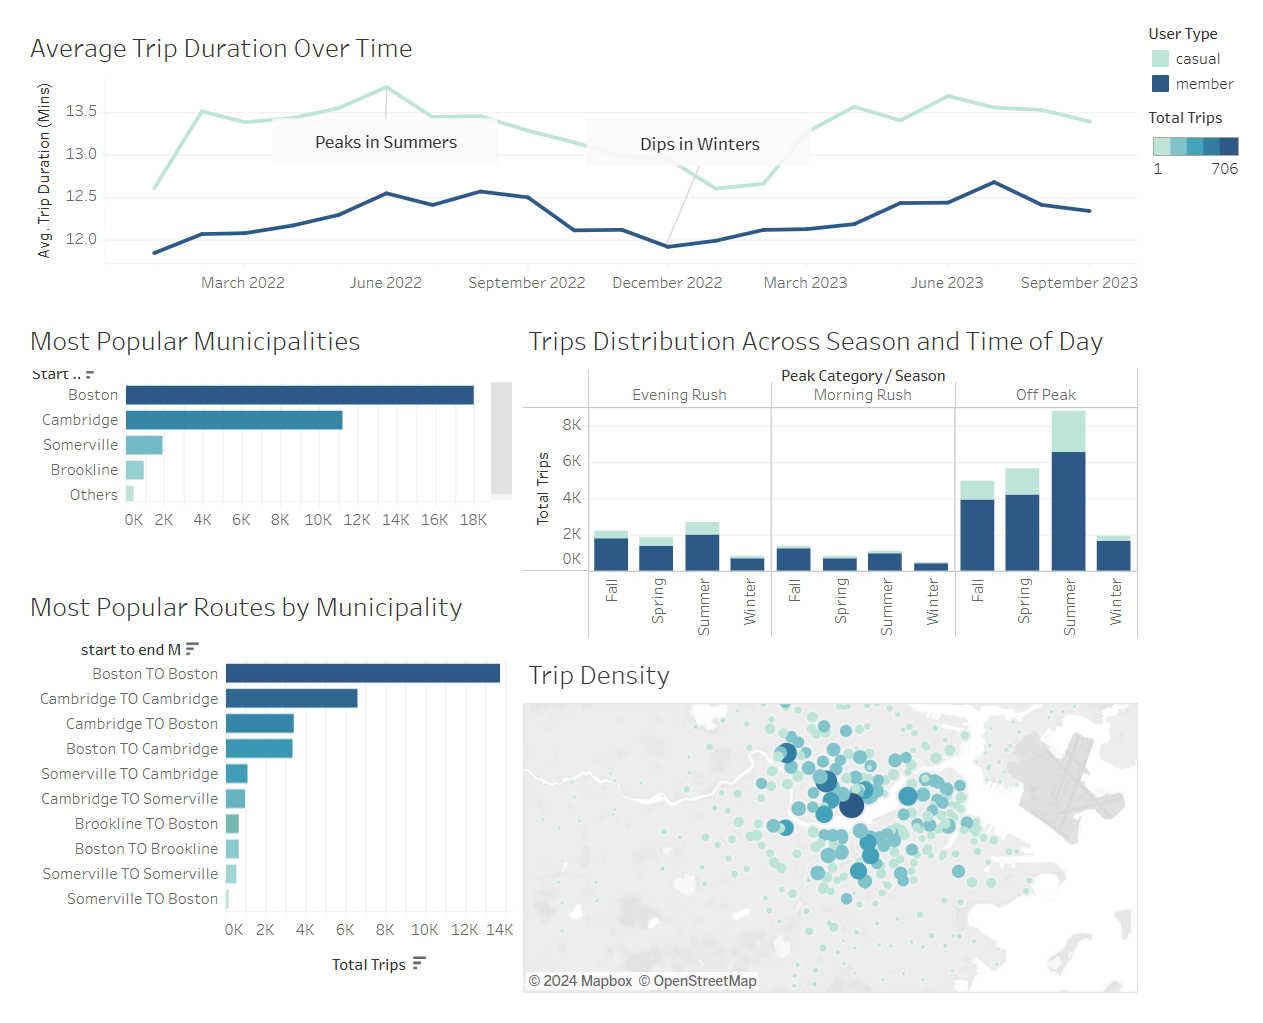

#<span style="font-family: Arial; font-size: 20px;color:#0047ab">**8. Key Insights**

- The most popular route for Bluebike riders is between MIT and Beacon St. at Mass Ave.

- Popular routes by municipalities include:
  - Cambridge-Boston
  - Somerville-Cambridge
  - Brookline-Boston
  - Somerville-Boston
  - Brookline-Cambridge
  
- Many routes involve MIT locations, suggesting it’s a major hub for Bluebikes.
- Harvard Square and Harvard University locations also feature prominently in several routes.
- Routes connect various academic institutions, squares, and streets in the area.

- People prefer longer bicycle rides during the summer, with August 2023 seeing an average duration spike of about 15 minutes more than in 2022.
- Overall trip usage for:
  - Casual users peaks at the end of summer and beginning of fall.
  - Members peaks during the fall season, rather than summer, which is surprising.
- By comparing 2023 data with 2022:
  - Both casual and member trips declined in June and July 2023.
  - Winter months like January, February, and December saw a sharp increase in trips compared to 2022.
- Municipalities with the most Bluebike stations:
  - Boston (264 stations)
  - Cambridge (89 stations)
  - Somerville (36 stations)
  - Salem (18 stations)
  - Newton (15 stations)
  - These areas have high numbers of offices and colleges, making them popular destinations.
- Municipalities with the fewest Bluebike stations:
  - Malden, Revere, Chelsea, Arlington, and Watertown.
  - These areas have fewer Bluebike users and are less densely populated compared to Boston, Brookline, and Cambridge.
- Most active municipalities by ride origin:
  - Boston, Cambridge, Somerville, Brookline, and Watertown.
  - Despite high demand, Brookline and Watertown have only 14 and 6 stations respectively, indicating a potential need for more stations in these areas.
- MIT at Mass Ave / Amherst St. is the most popular start/end station throughout the year, likely due to its strategic location near the Harvard bridge.
- The top 3 most popular start/end stations are all located in Cambridge.


#<span style="font-family: Arial; font-size: 20px;color:#0047ab">**7. Conclusion**

This comprehensive analysis of Greater Boston BlueBikes usage during 2022-2023 highlights critical insights into rider behavior, infrastructure limitations, and operational inefficiencies. These findings provide a roadmap to enhance service accessibility, efficiency, and user satisfaction while identifying opportunities for strategic expansion and data-driven improvements.

**Insights**
1.	**Key Demand Trends:** Member usage peaks in fall, casual riders dominate late summer, and weekday trips gained prominence in 2023.
2.	**Popular Routes and Hubs:** Routes between Cambridge, Boston, and Brookline are the busiest, with the MIT station at Mass Ave / Amherst St as the top hub.
3.	**Infrastructure Gaps:** High-demand areas like Brookline and Watertown lack sufficient stations. Low-capacity stations support longer trips, while high-capacity stations enable shorter, frequent rides.
4.	**Shifting Demand:** Turnover rates dropped across top stations, with localized demand surges (e.g., Boylston St's rise in popularity) suggesting targeted growth opportunities.

**Recommendations**
*	**Expand Infrastructure:** Add stations in underserved high-demand areas like Brookline, Watertown, and Revere to close accessibility gaps.
*	**Seasonal Adjustments:** Deploy more bikes in winter and optimize summer station placements to support increased recreational usage.
*	**Operational Efficiency:** Focus on weekday service reliability and optimize resources for peak usage days like Thursdays.
*	**Data-Driven Strategies:** Use MBTA outage and ridership data to predict demand surges and optimize bike allocation dynamically.

**Future Steps**
*	**Advanced Data Integration:** Incorporate predictive analytics using MBTA data and real-time ridership patterns to improve operational planning.
*	**Behavioral Analysis:** Dive deeper into rider preferences to design tailored promotions and service adjustments for both casual and member users.
*	**Segment-Specific Insights:** Study the behavior of niche rider segments (e.g., students, commuters, tourists) to design segment-specific campaigns and service offerings.
*	**Competitve Benchmarking:** Compare BlueBikes’ performance to other U.S. bike-share systems to identify best practices and competitive advantages.
*	**Technology Implementation:** Deploy smart sensors at stations to monitor availability and identify bottlenecks in real time.

This analysis establishes a strong foundation for improving BlueBikes' accessibility and efficiency while addressing the diverse needs of its users. By leveraging the insights and recommendations provided, the system can drive sustained growth, enhance user satisfaction, and solidify its role as a critical component of Greater Boston's transportation network.


#<span style="font-family: Arial; font-size: 20px;color:#0047ab"> **8. Challenges**

1. NaN values for Sept 23:

We initially joined and then tried to clean the data, leading to an absurd situation where there were values for every row except for September 2023. This was resolved after changing our approach to cleaning the data first and joining it later.


2. IQR Filtering for better analysis:

When we analysed the trip duration in the dataset, we found that the standard deviation (25521) was significantly larger than the median (723), and the mean (1549). That indicated a lot of noise in the data. This happened because of two reasons: some users started the trip and immediately cancelled it, while others didn’t cancel it even after 7 hours. and We decided to filter the data using Interquartile Range for the trip duration. This ensured that the noise in the dataset was reduced.
SQL query:
%%bigquery
SELECT ROUND(AVG(trip_duration),1)as avg_duration, ROUND(STDDEV(trip_duration),1) as std_dev, (WITH ranked_trips AS (
  SELECT
    trip_duration,
    ROW_NUMBER() OVER (ORDER BY trip_duration) as row_num,
    COUNT(*) OVER () as total_count
  FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`
)
SELECT AVG(trip_duration) as median_duration
FROM ranked_trips
WHERE row_num IN ((total_count + 1)/2, (total_count + 2)/2)) as median_duration
FROM `ba775-project-a05.bluebike_trips.final_version_bluebike_trips`

Finally, We used a random sample from this dataset for our Tableau Visualisations.


#<span style="font-family: Arial; font-size: 20px;color:#0047ab"> **9. References**

1.  [Bluebike station winter service explained](https://www.somervillema.gov/bikeshare)
1.	[Mohammad Soltanieh-ha, "BA775 -Business Analytics Toolbox", Colab Notebooks, Fall 2024](https://github.com/soltaniehha/Business-Analytics-Toolbox)
2.	[Datacamp Modules](https://app.datacamp.com/learn/assignments)
3.	[Previous Year Projects](https://github.com/soltaniehha/Business-Analytics-Toolbox/tree/master/docs/team-projects)
4.	[Tableau Chart Ideas](https://www.simplilearn.com/tutorials/tableau-tutorial/tableau-charts)
5. [Bike and Scooter Rental Market](https://www.marketsandmarkets.com/Market-Reports/bike-scooter-rental-market-122654882.html)


#<span style="font-family: Arial; font-size: 20px;color:#0047ab">**10. Generative AI statement**

In completing this project, we have utilized Generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:

-	Code Review and Debugging: We used GPT-4o to make our code more efficient, resolve syntax errors and add few components to certain visualisation codes.

-	Proofreading and Grammar Checks: We used Grammarly to refine our writing, improve readability, and ensure grammatical accuracy.

-	Colormapping: We used ChatGPT to explore available color palettes and how they can be integrated.

-	Legend and Title: We used ChatGPT to understand how to bring the legend and title to the center, as they were overlapping.

-	We used ChatGPT with the syntax for creating calculated fields in Tableau.


Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.
